# Προπαρασκευαστικό μέρος
## Ζερκελίδης Δημήτριος - 03400049
## Καϊκτζόγλου Μαρία - 03400052

In [64]:
import librosa
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### Παρατηρούμε ότι τα  pitches των ανδρών ειναι χαμηλότερα από των γυναικών, ενώ τα αντίστοιχα formants είναι υψηλότερα εκτός από εκείνο του "ee"

In [2]:
mpitch_a = 133.89772728031835
mpitch_ou = 131.811133529993
mpitch_ee = 132.53369539237607

fpitch_a = 178.12173373092025 
fpitch_ou = 186.91594237597815
fpitch_ee = 179.3232635705614


In [3]:
mformant_a = 973.7786270117064
mformat_ou = 1416.082904798625
mformant_ee = 861.5761326890951

fformant_a = 676.149966765966
fformant_ou = 724.4027394814183  
fformant_ee = 909.8694637257404 

### Βήμα 2: Οι λίστες audios, speakers, digits με τον parser. Στη συνέχεια αποθηκεύουμε σε λίστες τα εξαγόμενα αποτελέσματα και μετά διαχωρίζουμε τα σήματα από το sample rate, γιατί η εντολή librosa.load επιστρέφει ένα tuple με το σήμα και το sample rate.  

In [67]:
path = './digits'

def parser(path):
    lib_audio=[]
    speaker = []
    digit   = []
    for file in audio_files:
        lib_audio.append(librosa.load(file,16000))
        temp = file.split("/")[-1].split(".")[0] # to string einai tis morfis digitSpeaker.
        #diaxwrismos tou digit apo ton arithmo speaker
        temp_digit = temp.rstrip('0123456789')
        digit.append(temp_digit)
        speaker.append(temp[len(temp_digit):])
    return lib_audio, speaker,digit 

In [68]:
''' αποθηκεύουμε σε global λίστες τους υπολογισμούς της parser '''
audios_samplerate, speakers, digits = parser(audio_files)


In [69]:
''' διαχωρίζουμε τα audios από το sample rate και τα αποθηκεύουμε αντιστοίχως '''
audios = []
sample_rate = 16000
for i in range(len(audios_samplerate)):
    audios.append(np.array(audios_samplerate[i][0]))



### Βήμα 3: Για κάθε εκφώνηση, για κάθε παράθυρο της, εξάγουμε 13 mfcc. 

In [77]:
mfcc_features = []    
mfcc_features_5 = []    # θα τα χρειαστούμε για το βήμα 4
mfcc_features_2 = []    # ομοίως
i = 0
srt = 16000
for audio in audios:
    mfcc_features.append(librosa.feature.mfcc(y=audio, sr=srt, n_mfcc=13, hop_length=int(0.01*srt),
                                              win_length=int(0.025*srt)))
    if digits[i] == "five":
        mfcc_features_5.append(librosa.feature.mfcc(y=audio, sr=srt, n_mfcc=13, hop_length=int(0.01*srt),
                                              win_length=int(0.025*srt)))
    elif digits[i] == "two":
         mfcc_features_2.append(librosa.feature.mfcc(y=audio, sr=srt, n_mfcc=13, hop_length=int(0.01*srt),
                                              win_length=int(0.025*srt)))
    i = i+1
    


### Υπολογισμός των πρώτων και δεύτερων μερικών παραγώγων των αρχείων

In [78]:
''' 1st and 2nd partial derivatives'''

deltas1 = []
deltas2 = []
for mfcc in mfcc_features:   # for every audio
    deltas1.append(librosa.feature.delta(mfcc, width=9, order=1, axis=-1))
    deltas2.append(librosa.feature.delta(mfcc, width=9, order=2, axis=-1))


In [79]:
np.shape(deltas1[0])==np.shape(deltas2[0])==np.shape(mfcc_features[0])  
# verifications...
#mfcc_features_5[0].shape

True

### Βήμα 4


### Στα παρακάτω ιστογράμματα:
#### 1ο output -> ψηφίο 5,  feature 0
#### 2o output -> ψηφίο 5, feature 1
#### 3o output -> ψηφίο 2, feature 0
#### 4o output -> ψηφίο 2, feature 1

#### παρατηρούμε ότι υπάρχει μια "ομαλή" κίνηση στα bars από το feature 0 -> feature 1, το οποίο είναι και αναμενόμενο καθώς αφορά διπλανά παράθυρα στο σήμα και άρα οι μεταβολές στη συχνότητα αναμένονται να είναι ομαλές

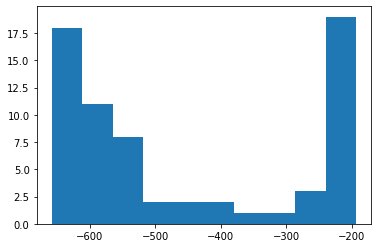

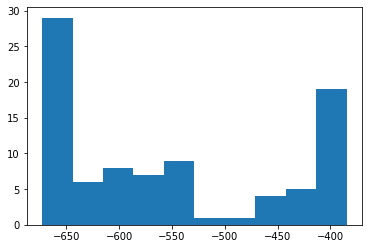

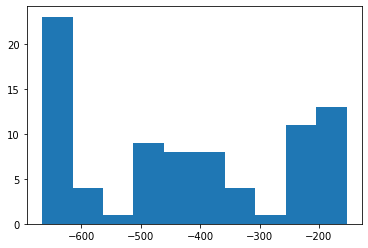

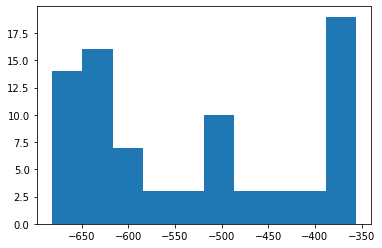

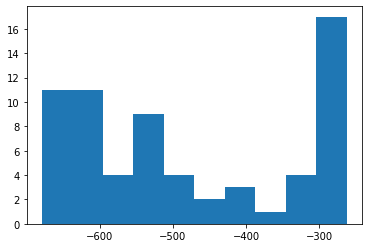

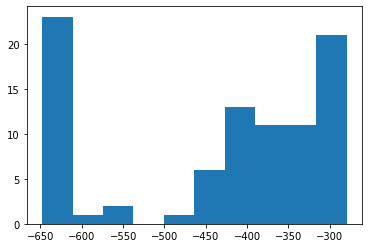

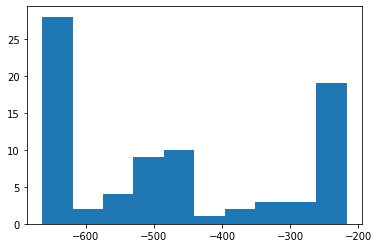

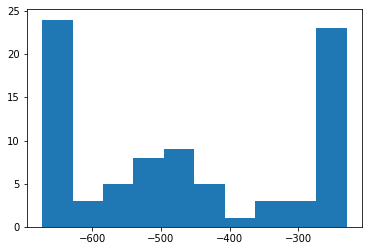

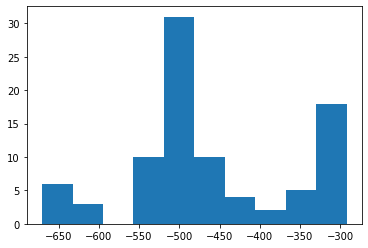

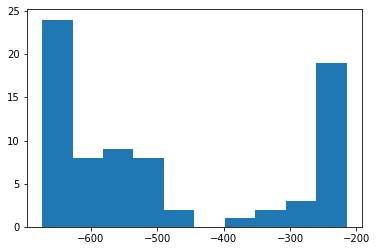

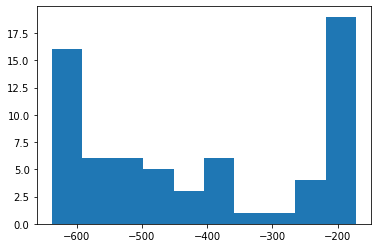

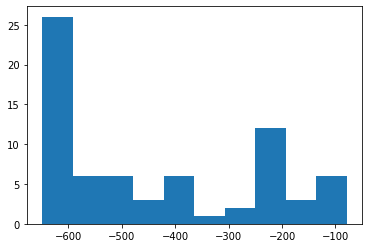

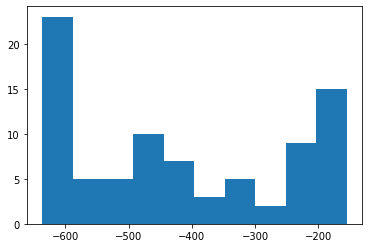

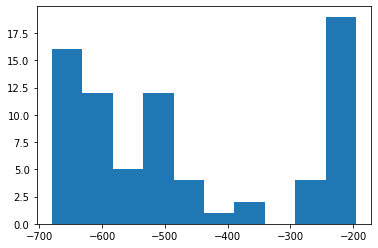

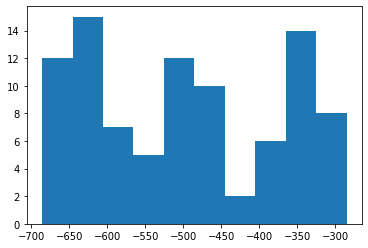

In [80]:
for i in range(len(mfcc_features_5)):
    plt.hist(mfcc_features_5[i][0])
    plt.show()
#mfcc_features_5

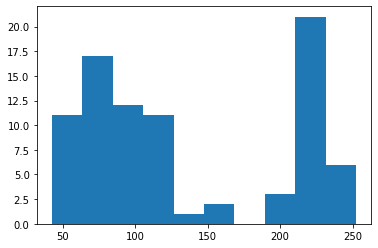

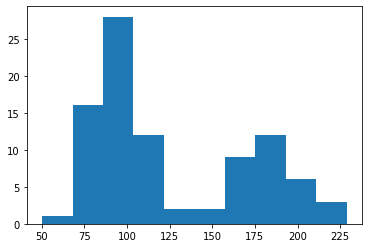

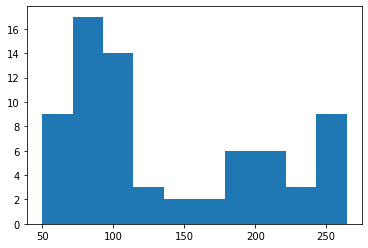

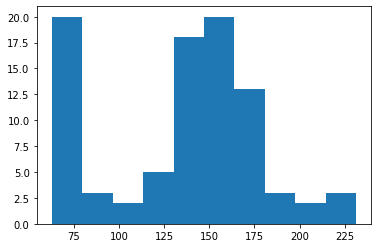

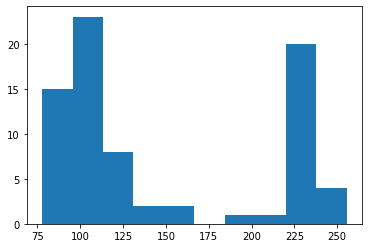

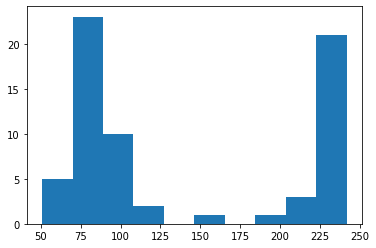

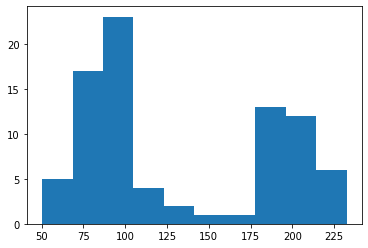

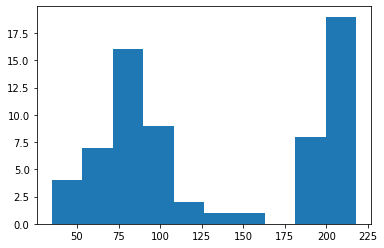

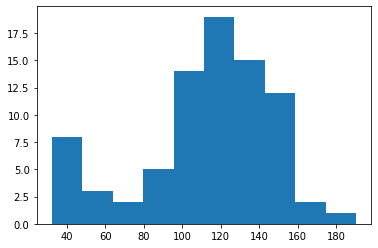

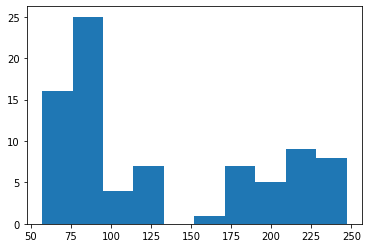

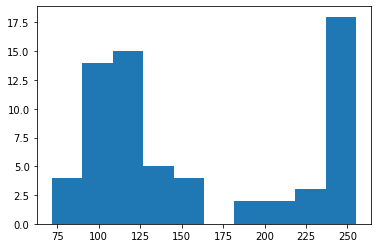

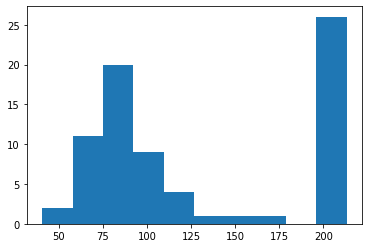

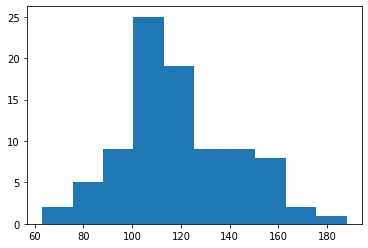

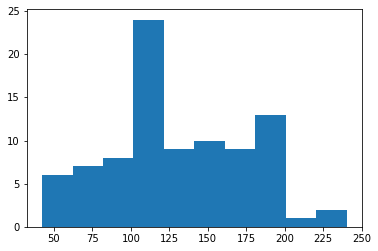

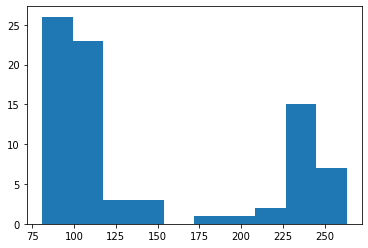

In [46]:
for i in range(len(mfcc_features_5)):
    plt.hist(mfcc_features_5[i][1])
    plt.show()

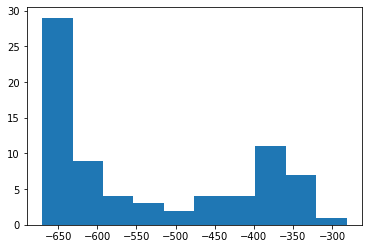

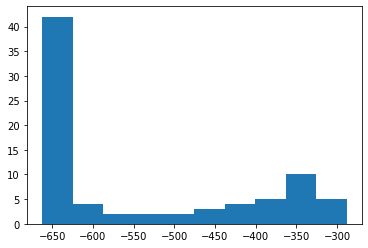

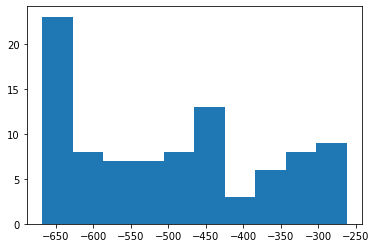

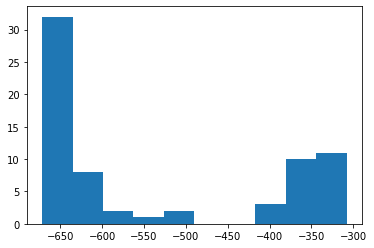

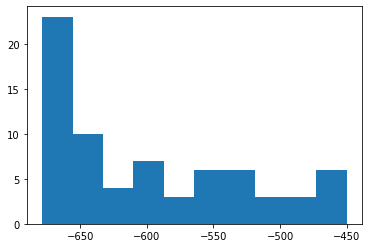

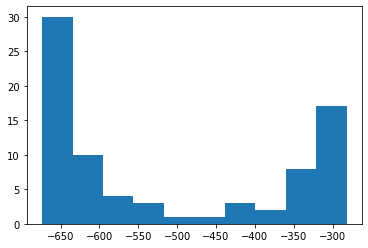

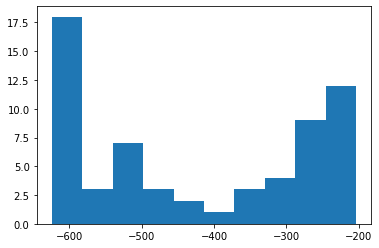

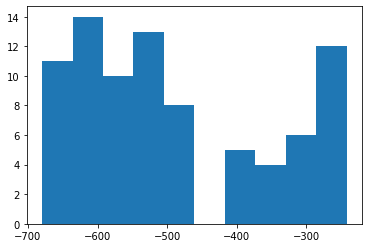

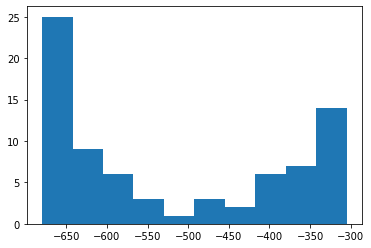

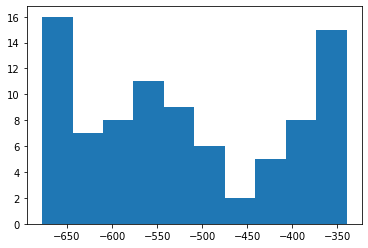

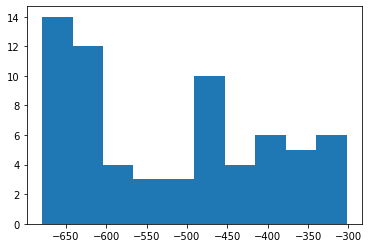

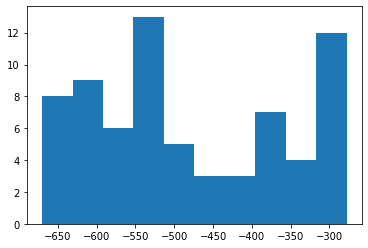

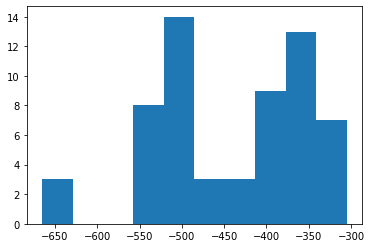

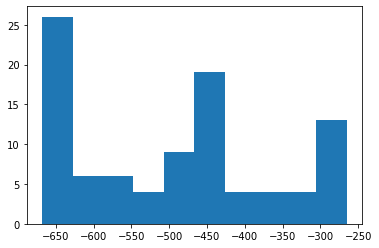

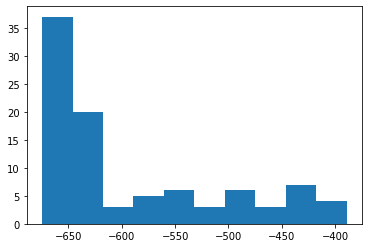

In [47]:
for i in range(len(mfcc_features_2)):
    plt.hist(mfcc_features_2[i][0])
    plt.show()

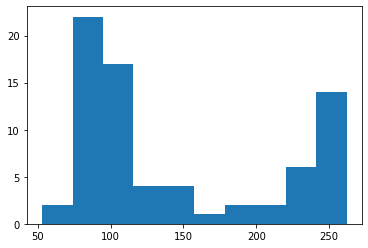

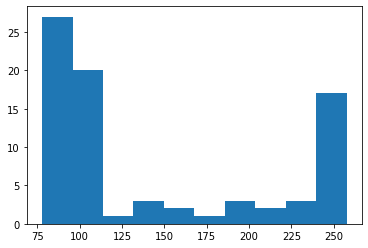

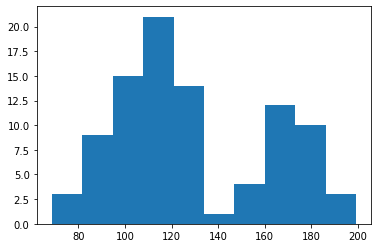

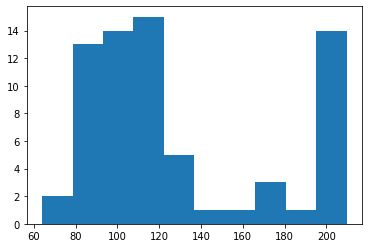

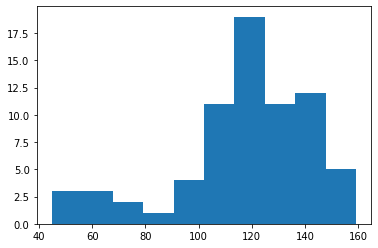

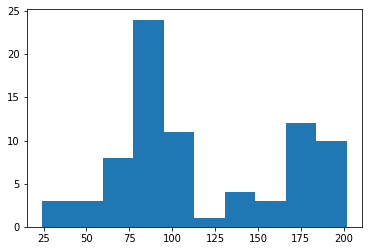

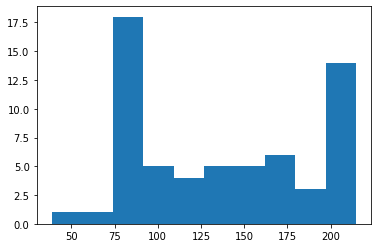

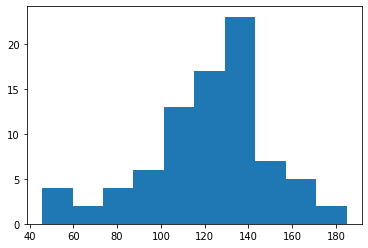

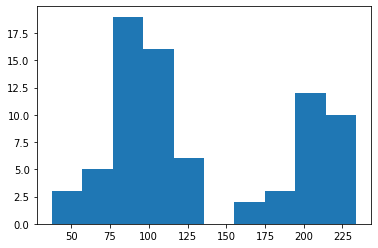

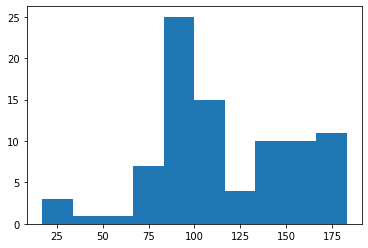

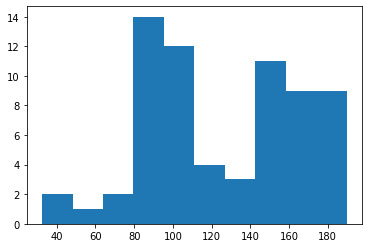

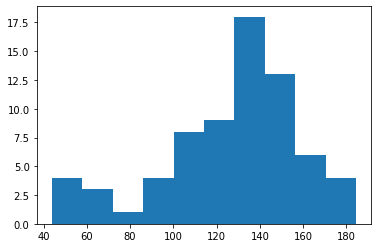

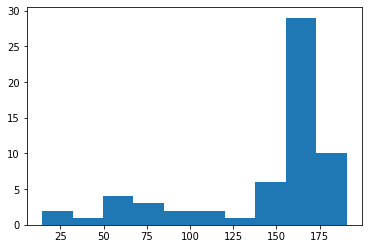

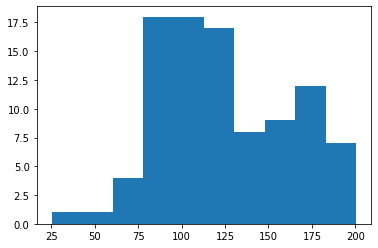

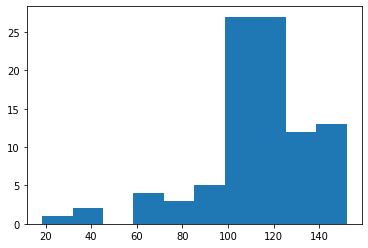

In [48]:
for i in range(len(mfcc_features_2)):
    plt.hist(mfcc_features_2[i][1])
    plt.show()

### Εξάγουμε τα χαρακτηριστικά mel filterbank spectral frequency (13 στο πλήθος για κάθε παράθυρο) για 2 τυχαίες εκφωνήσεις από διαφορετικούς ομιλητές για τα ψηφία "2" και "5"

In [81]:
mfsc_features_2 = []
mfsc_features_5 = []

mfsc_features_2.append(librosa.feature.melspectrogram(y=audios[2], sr=srt, n_fft=int(srt*0.025),hop_length=int(0.01*srt)
                                                      ,win_length=int(0.025*srt), n_mels=13))
mfsc_features_2.append(librosa.feature.melspectrogram(y=audios[12],sr=srt, n_fft=int(srt*0.025),hop_length=int(0.01*srt)
                                                      , win_length=int(0.025*srt), n_mels=13))
mfsc_features_5.append(librosa.feature.melspectrogram(y=audios[0],sr=srt, n_fft=int(srt*0.025),hop_length=int(0.01*srt)
                                                      , win_length=int(0.025*srt), n_mels=13))
mfsc_features_5.append(librosa.feature.melspectrogram(y=audios[8], sr=srt, n_fft=int(srt*0.025),hop_length=int(0.01*srt)
                                                      , win_length=int(0.025*srt), n_mels=13))


In [82]:
# μερικοί έλεγχοι - ας αγνοηθούν
print(np.shape(mfcc_features[0]))
np.shape(mfsc_features_5[1])

(13, 82)


(13, 92)

### Γραφική αναπαράσταση της συσχέτισης των mfcc. Παρατηρούμε ότι η κύρια διαγώνιος, η οποία περιέχει την πληροφορία για τη συσχέτιση της ίδιας μεταβλητής/vector, έχει καθαρό έντονο χρώμα (κίτρινο εν προκειμένω), κάτι που δηλώνει τη μεγάλη συσχέτιση. Τα υπόλοιπα διανύσματα mfcc έχουν χαμηλότερη συσχέτιση όπως φαίνεται από τα πιο ήπια χρώματα στα αντίστοιχα κουτάκια.

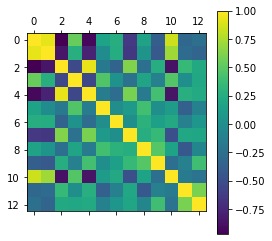

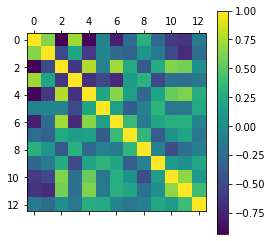

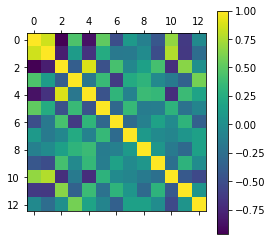

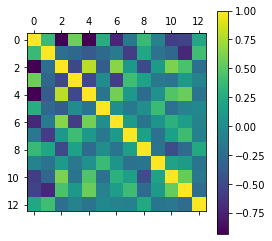

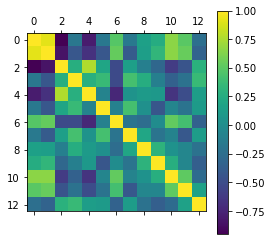

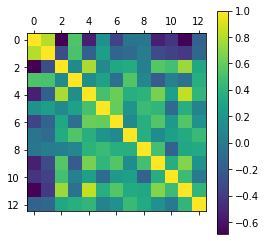

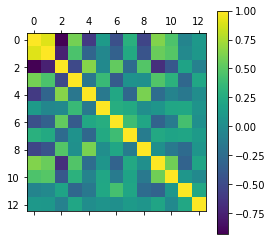

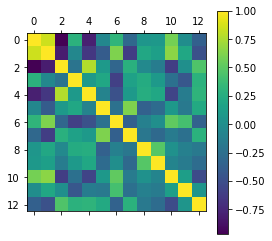

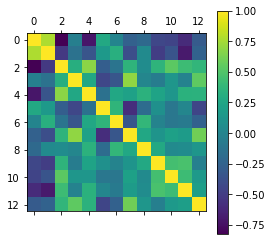

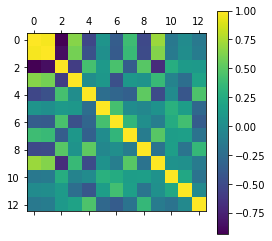

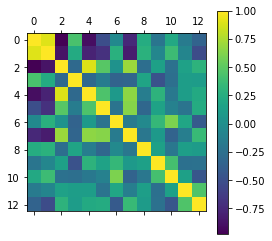

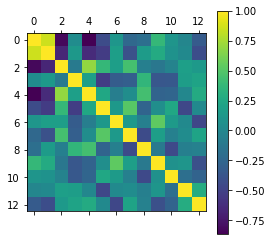

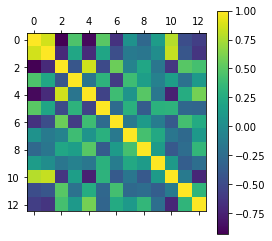

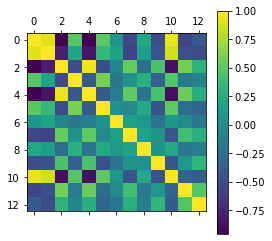

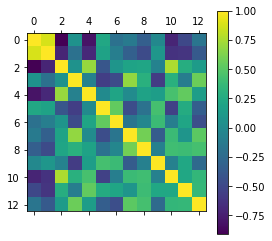

In [108]:
# plot correlation matrices for the "5"-digit mfccs
for i in range(len(mfcc_features_5)):
    plt.matshow(pd.DataFrame(mfcc_features_5[i]).T.corr())
    plt.colorbar()
    plt.show()


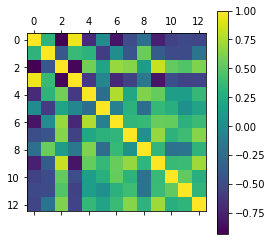

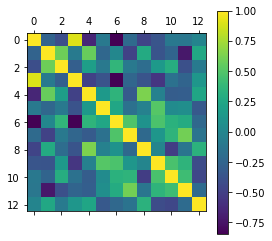

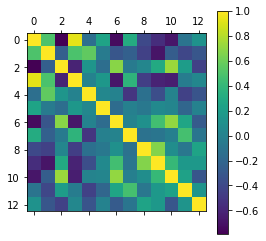

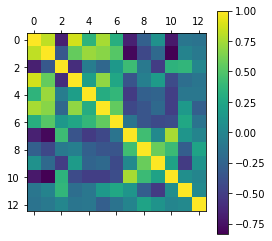

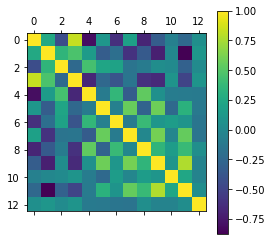

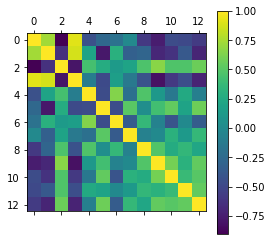

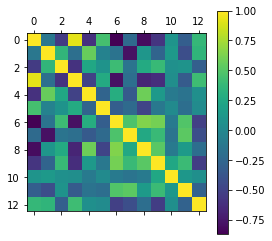

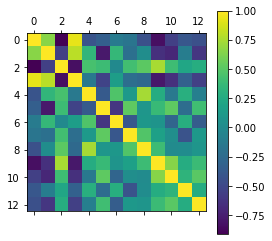

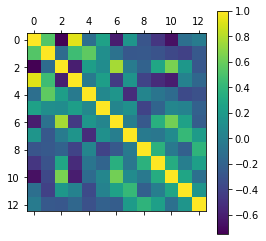

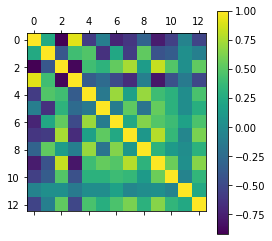

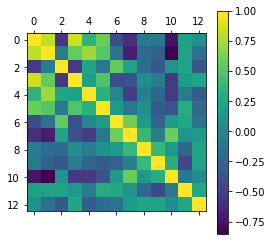

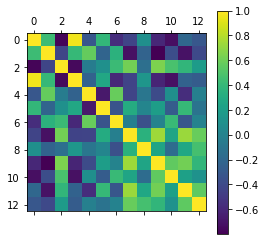

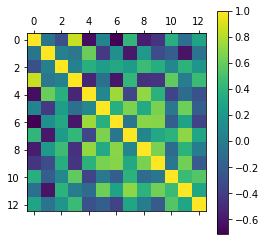

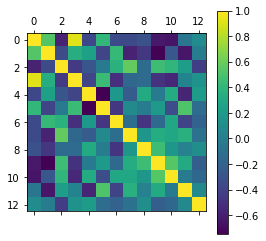

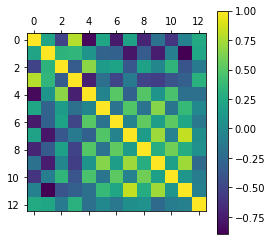

In [109]:
# plot correlation matrices for the "2"-digit mfccs

for i in range(len(mfcc_features_5)):
    plt.matshow(pd.DataFrame(mfcc_features_2[i]).T.corr())
    plt.colorbar()
    plt.show()

### Γραφική αναπαράσταση της συσχέτισης των mfsc. Σε αντίθεση με τους πίνακες συσχέτισης των mfcc, εδώ βλέπουμε ότι τα διαφορετικά διανύσματα παρουσιάζουν επίσης μεγάλη συσχέτιση (τα χρώματα στα κουτάκια είναι πιο "κιτρινίζοντα" σε σχέση με τα αντίστοιχα των mfccs. Αυτή η μεγάλη συσχέτιση στα διανύσματα υποδεικνύει ότι τα mfscs δε θα αποτελέσουν καλό training sample για τους classifiers.

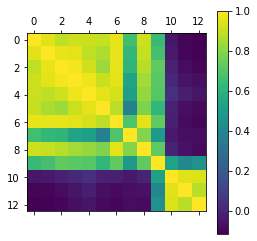

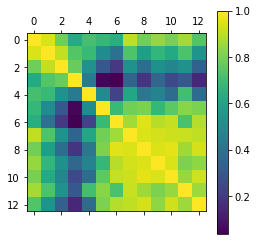

In [110]:
for i in range(len(mfsc_features_5)):
    plt.matshow(pd.DataFrame(mfsc_features_5[i]).T.corr())
    plt.colorbar()
    plt.show()

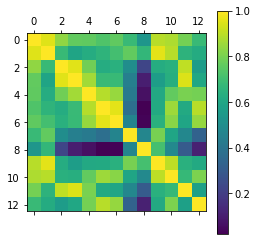

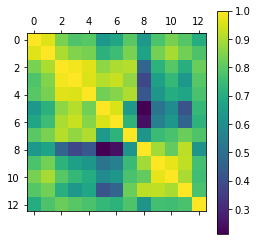

In [111]:
for i in range(len(mfsc_features_2)):
    plt.matshow(pd.DataFrame(mfsc_features_2[i]).T.corr())
    plt.colorbar()
    plt.show()


### Βήμα 5. Eνωνουμε τα mfcc με τις παραγωγους 1ης και 2ης ταξης, στοιβάζοντας τα "πακετα" των 13 διανυσμάτων το ένα κάτω από το άλλο. Σαν αποτελεσμα εχουμε ενα np.array (πινακα) διάστασης 39xW, όπου w διαφέρει φυσικά για την κάθε εκφώνηση.


In [83]:
union = []
for i in range(len(audios)):
    union.append(np.concatenate((mfcc_features[i], deltas1[i], deltas2[i]), axis=0)) 
    # axis=0 για να μπούνε το ένα κάτω από το άλλο

In [85]:
np.shape(mfcc_features[0]) == np.shape(deltas1[0]) == np.shape(deltas2[0]) 
np.shape(union[0])
np.shape(union[10])
# μερικοί έλεγχοι

(39, 71)

### Τώρα θα εξάγουμε τους μέσους όρους και τις τυπικές αποκλίσεις για κάθε κάθε χαρακτηριστικό (mfcc, D & DD) σε όλα τα παράθυρα. Έτσι για κάθε εκφώνηση θα έχουμε ένα unique_vector διάστασης 39*2 (13 mfcc, 13 D & 13 DD, 2 τιμές -mean & std για το καθένα).

In [86]:
means =[]
stds = []
unique_vectors = [None]*len(audios)

for i in range(len(audios)):    # for the i-th audio, its union is a (39, *) array
    current_audio_means=[]  # each audio will give 39 means and 39 stds, so we will end up with a 39x2 vector
    current_audio_stds=[]
    
    for j in range(39):   # iterate over the united mfcc-D-DD rows to get their mean & std
        current_audio_means.append((union[i][j]).mean())  # mean of the j-th row
        current_audio_stds.append((union[i][j]).std())    # std of the j-th row
        
    current_audio_means = np.array(current_audio_means)   #convert the lists to np.arrays
    current_audio_stds = np.array(current_audio_stds)
    unique_vectors[i] = [current_audio_means, current_audio_stds]
    
    means.append(current_audio_means)   # append these to the i-th
    stds.append(current_audio_stds)

#means=np.array(means)
#stds=np.array(stds)

np.shape(unique_vectors)
#unique_vectors[0]  # first array is the means , 2nd array is the stds

(133, 2, 39)

In [87]:
print(len(means[10]))
print(len(stds[10]))
print(len(unique_vectors[10]))
# some checks...

39
39
2


### Αναπαράσταση σε scatter diagram των 2 διαστάσεων των unique vectors, δηλαδή των πρώτων means & stds, οπότε για κάθε ψηφίο θα εμφανιστούν τόσα σημεία στο scatter diagram όσα και οι εκφωνήσεις τους, που θα αναπαριστούν τη σχέση αυτή των means & stds. 

In [88]:
x1 = [unique_vectors[i][0][0] for i in range(133)]
x2 = [unique_vectors[i][0][1] for i in range(133)]
group = np.array(digits)
group
cdict = {'one':'red','two':'blue','three':'green','four':'gray','five':'olive','six': 
         'cyan','seven':'pink','eight':'brown','nine':'purple'}

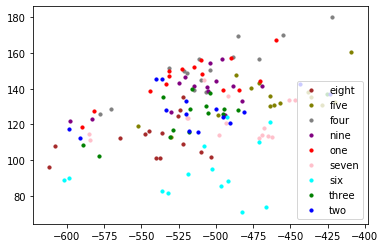

In [89]:
fig, ax = plt.subplots()
seen = []
for g in np.unique(group):
    ix = np.where(group == g)
    #print(ix)
    #print(len(ix[0]))
    for i in range(len(ix[0])):
        if g in seen:
            ax.scatter(x1[ix[0][i]],x2[ix[0][i]],c = cdict[g],s=10)
        else:
            ax.scatter(x1[ix[0][i]],x2[ix[0][i]],c = cdict[g],label=g,s=10)
            seen.append(g)
ax.legend()
plt.show()


### Βήμα 6

In [90]:
if False:
    ''' First we standardize the data'''
    from sklearn.preprocessing import StandardScaler

    unique_vectors_standardized=[]     # this is our data in the union mfcc-D-DD standardized
    for i in range(len(unique_vectors)):
        unique_vectors_standardized.append(StandardScaler().fit_transform(np.array(unique_vectors[i]).flat))
        
len(unique_vectors)

133

### Αρχικά κανουμε τα unique vectors flatten. Στη συνέχεια εφαρμόζουμε το PCA για να μειώσουμε τις διαστάσεις των unique vectors από 78 σε 2.

In [91]:
for i in range(len(unique_vectors)):
    unique_vectors[i] = np.array(unique_vectors[i]).flatten()
np.shape(unique_vectors)

(133, 78)

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(unique_vectors)
pca_unique_vectors = pca.transform(unique_vectors)
print(pca.explained_variance_ratio_.cumsum())    


[0.58491722 0.70501691]


### Πάνω βλέπουμε ότι το συνολικό ποσοστό της αρχικής πληροφορίας που περιέχουν unique vectors μετά το PCA αντιστοιχεί περίπου στο 70% της πληροφορίας που περιείχαν πριν το PCA, μη  ικανοποιητικό ποσοστό.

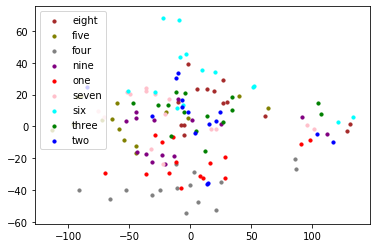

In [93]:
p1 = pca_unique_vectors[:,0]
p2 = pca_unique_vectors[:,1]


fig, ax = plt.subplots()
seen = []
for g in np.unique(group):
    ix = np.where(group == g)
    #print(ix)
    #print(len(ix[0]))
    for i in range(len(ix[0])):
        if g in seen:
            ax.scatter(p1[ix[0][i]],p2[ix[0][i]],c = cdict[g],s=10)
        else:
            ax.scatter(p1[ix[0][i]],p2[ix[0][i]],c = cdict[g],label=g,s=10)
            seen.append(g)
ax.legend()
plt.show()

### Επαναλαμβάνουμε το ίδιο με pca για 3 διαστάσεις. Το ποσοστό πληροφορίας που διατηρείται τώρα είναι μεγαλύτερο, στο -περίπου- 81%.

In [94]:
pca3c = PCA(n_components=3)
pca3c.fit(unique_vectors)
pca3c_unique_vectors = pca3c.transform(unique_vectors)
print(pca3c.explained_variance_ratio_.cumsum())    


[0.58491722 0.70501691 0.81437483]


### Αντίστοιχο scatter plot σε τρεις διαστάσεις.

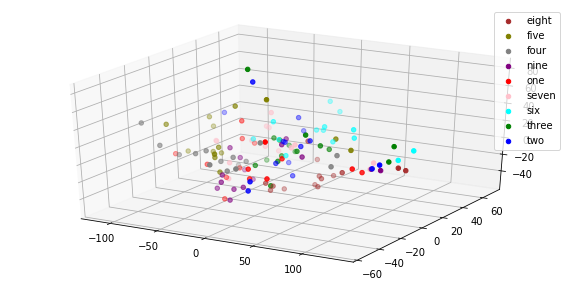

In [95]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure(1, figsize=(10, 5))
ax = plt.axes(projection='3d')
t1 = pca3c_unique_vectors[:,0]
t2 = pca3c_unique_vectors[:,1]
t3 = pca3c_unique_vectors[:,2]
for g in np.unique(group):
    ix = np.where(group == g )
    ax.scatter3D(t1[ix], t2[ix], t3[ix], c = cdict[g],label=g,s=20)
ax.legend()

## Βήμα 7

### Χωρίζουμε τα δεδομένα σε train & test, με test size 30%.

In [96]:
unique_vectors = np.asarray(unique_vectors)

In [141]:
labels_to_number= {'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9}
labels=[]
for i in group:
    labels.append(labels_to_number[i])
y = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(unique_vectors, y, test_size=0.3)

In [98]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import math

class BayesianClassifier(BaseEstimator, ClassifierMixin):  
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self):
        self.X_mean_ = None
        self.X_var_ = None
        self.a_priori_ = None
        self.classes_ = None

    def fit(self, X, y):
        
        # find a-priori probabilities
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        # calculate mean, var, and prior for each class
        self.X_mean_ = np.zeros((n_classes, n_features), dtype=np.float64)
        self.X_var_ = np.zeros((n_classes, n_features), dtype=np.float64)
        self.a_priori_ =  np.zeros(n_classes, dtype=np.float64)

        for c in range(1, 10):
            X_c = X[y==c]

            self.X_mean_[c-1] = X_c.mean(axis=0)
            self.X_var_[c-1] = X_c.var(axis=0)
            self.a_priori_[c-1] = X_c.shape[0] / float(n_samples)
        self.X_var_[self.X_var_ == 0] = 0.0001 # γιατί μετά θα κάνουμε διαίρεση με το 0 η οποία δεν ορίζεται
         

    
    def pdf(self,class_idx,x):
        mean = self.X_mean_[class_idx]
        var = self.X_var_[class_idx]
        numerator = np.exp(-(x-mean)**2 / (2*var))
        denominator = np.sqrt(2* np.pi * var)
        return numerator / denominator
            
    
    
    def predict_function(self, X):
        """
        get the highest gaussianNB probability and classify the value in that class.
        """
        predictions= []
        posteriors = []
        for i in range(1,10): # τρέχει για  i από 1-9
            prior = self.a_priori_[i-1]
            loginput = self.pdf(i-1,X)
            loginput[loginput == 0] = 0.0001 # γιατί το log(0) δεν ορίζεται
            class_conditional = np.sum(np.log(loginput))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return np.argmax(posteriors)+1
        
    def predict(self,X):
        y_pred = [self.predict_function(x) for x in X] # προέβλεψε για κάθε sample την κλάση του και βάλε την
        return np.array(y_pred)                          # στη λίστα.
            
      

    
    def scorer(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        acc_arr = (X == y)
        
        return (np.sum(acc_arr) / X.shape[0]) * 100


In [99]:
clf = BayesianClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print("Bayesian Classifier Accuracy: {} %".format(clf.scorer(preds, y_test)))

Bayesian Classifier Accuracy: 62.5 %


In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=1e-09)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Sklearn Bayesian Accuracy: {} %".format(100*gnb.score(X_test, y_test)))

Sklearn Bayesian Accuracy: 62.5 %


In [72]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [73]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train) 

neigh.predict(X_test)
print("KNN Accuracy: {} %".format(100*neigh.score(X_test, y_test)))

KNN Accuracy: 47.5 %


In [74]:
svm_l = SVC(kernel="linear") 
svm_l.fit(X_train, y_train)
svm_l.predict(X_test)
svm_l.score(X_test, y_test)
print("SVM -linear kernel- accuracy: {} %".format(100*svm_l.score(X_test, y_test)))

SVM -linear kernel- accuracy: 85.0 %


In [75]:
svm_poly = SVC(kernel="poly", gamma="auto")  
svm_poly.fit(X_train, y_train)
svm_poly.predict(X_test)
svm_poly.score(X_test, y_test)
print("SVM -polynomial kernel- accuracy: {} %".format(100*svm_poly.score(X_test, y_test)))

SVM -polynomial kernel- accuracy: 85.0 %


## BONUS PART ~ ΧΡΗΣΗ ZERO CROSSING RATE

To zero crossing rate ουσιαστικά χρησιμοποιείται για να αφαιρέσουμε τα σημεία σιγής σε ένα ηχητικό κύμα, καθώς όταν υπάρχει πάυση το σήμα πάει πάνω-κάτω από το 0 πολλές φορές , επομένως όταν είναι υψηλό το rate θέλουμε να αφαιρέσουμε εκείνο το σημείο. Παρακάτω θα εξάγουμε τα χαρακτηριστικά του zero crossing rate και θα τα προσθέσουμε στα feature vectors των sample με το μέσο και τη διασπορά τους και θα δούμε για τον καλύτερο ταξινομητή μας αν υπάρχει καλύτερο αποτέλεσμα. 

Γενικά, θα περιμέναμε καλύτερα αποτελέσματα , ωστόσο ο τρόπος που διαχειριζόμαστε αυτά τα δεδομένα που χάνουμε μέσα στο χρόνο αρκετή πληροφορία μπορεί να μην επιφέρει τρομερές αλλαγές.

In [113]:
zc_rate = []
for audio in audios:
    zc_rate.append(librosa.feature.zero_crossing_rate(audio))

In [124]:
zc_mean_std = np.zeros((len(zc_rate),2))
for i in range(len(zc_rate)):     # for every audio serie's zero crossing rate - get mean and std
    zc_mean_std[i,0] = zc_rate[i].mean()       # mean
    zc_mean_std[i,1] = zc_rate[i].std()        # variance

In [125]:
zc_mean_std.shape # CHECK SHAPE

(133, 2)

In [149]:
from sklearn.preprocessing import StandardScaler
zc_mean_std_scaled= StandardScaler().fit_transform(zc_mean_std) # standarize data
        

In [150]:
zc_mfcc_dd = np.concatenate((zc_mean_std_scaled,unique_vectors),axis=1) # concatenate zero crossing rate with mfcc-d-dd

In [151]:
zc_mfcc_dd.shape # check shape after concatenation

(133, 80)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(zc_mfcc_dd, y, test_size=0.3)

In [153]:
from sklearn.svm import SVC
svm_l = SVC(kernel="linear") 
svm_l.fit(X_train, y_train)
svm_l.predict(X_test)
svm_l.score(X_test, y_test)
print("SVM -linear kernel- accuracy: {} %".format(100*svm_l.score(X_test, y_test)))

SVM -linear kernel- accuracy: 87.5 %


In [155]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=1e-09)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Sklearn Bayesian Accuracy: {} %".format(100*gnb.score(X_test, y_test)))

Sklearn Bayesian Accuracy: 72.5 %


Παρατηρούμε πως με την χρήση τον zero crossing rate ανεβάσαμε το classification accuracy σε ένα καλό ποσοστό όσον αναφορά τους αλγορίθμους SVM , GNB. 

# Βήμα 8 ~ pytorch - RNN - LSTM

Παρακάτω κάνουμε import το pytorch, numpy και matplotlib

In [102]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Σε αυτό το στάδιο, δημιουργούμε τις ζητούμενες ακολουθίες sine για το x και cosine για το y. Aυτό γίνεται με τον ακόλουθο τρόπο.

ορίζουμε μια μεταβλητή t η οποία περιέχει 10 σημεία στο χρόνο από το 0 ως το 2*π.

Γνωρίζουμε πως μια κυματομορφή sine ή cosine , δίνεται από την εξίσωση:
                    sine(2πft) ή cosine(2πft)
Στη συνέχεια για F=40 και t = τις 10 χρονικές στιγμές που έχουμε πάρει, λαμβάνουμε τις ακολουθίες sine και cos που χρειαζόμαστε.

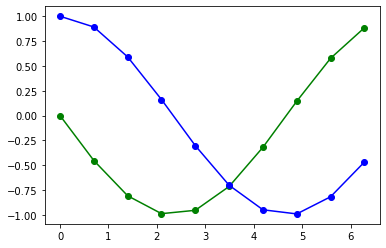

In [100]:
t = np.linspace(0,2*np.pi,10,dtype=np.float32) # 10 we choose 10 points in time
steps = (2*np.pi*40)*t # 2πft = ωt , frequency = 40
x = np.sin(steps)
y = np.cos(steps)

plt.plot(t,x,'g-',marker='o',label='x -> sin wave')
plt.plot(t,y,'b-',marker='o',label='y -> cos wave')
plt.show()

### BUILD RNN MODEL

Παρακάτω ορίζουμε ένα RNN μοντέλο.
Στην init αρχικοποιούμε το RNN  το οποίο έχει 1 layer , δέχεται 1 input και έχει 32 hidden layers τα οποία μετά μέσο του output layer το οποίο κάνει κάποια γραμμική με αυτά μας δίνεi to y.

Στη συνέχεια ορίζουμε την forward , η οποία δέχεται την ακολουθία του sine και μας προβλέπει την cosine ενώ ταυτόχρονα επιστρέφει ένα hidden layer το οποίο, πάει σαν είσοδο στα επόμενα time steps της ακολουθίας.

Τέλος, θέτουμε σαν optimization αλγόριθμο του μοντέλου τον Adam, με learning rate = 0.02

In [103]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        
        r_out, h_state = self.rnn(x, h_state)
        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.02)   # optimize all rnn parameters
loss_func = nn.MSELoss()

Παρακάτω, κάνουμε train τον αλγόριθμο ώστε να μάθει να προβλέπει τη συγκεκριμένη ακολουθία που δημιουργήσαμε παραπάνω.

Ταυτόχρονα τυπώνουμε τις κυματομορφές για να βλέπουμε και γραφικά πως βελτιώνεται το μοντέλο αλλά στη συνέχεια εκτυπώνουμε και το τελικό LOSS.

Έπειτα, μετατρέπουμε τις διαστάσεις των μεταβλητών στη μορφή:
                (batch, time_steps, input_size)
Στη δική μας περίπτωση θα είναι:
                 (1, len(x), 1)

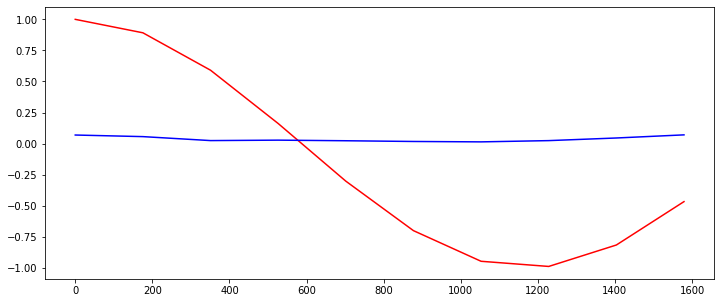

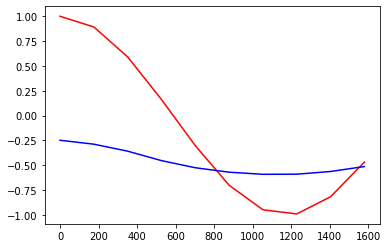

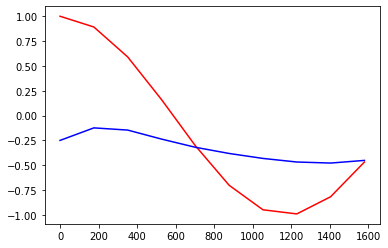

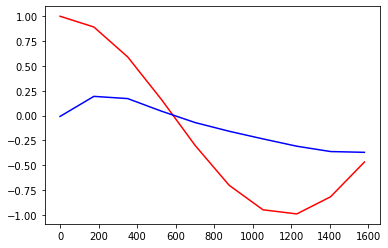

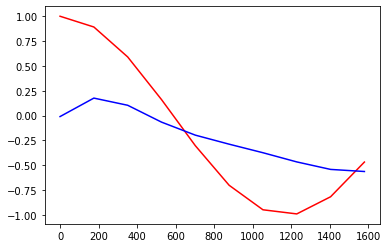

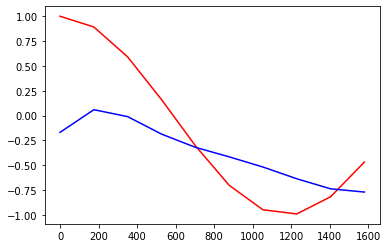

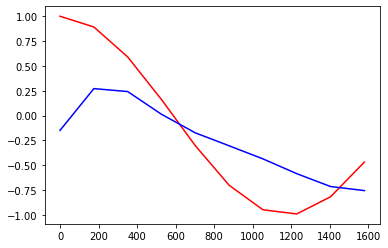

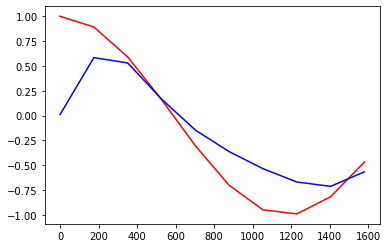

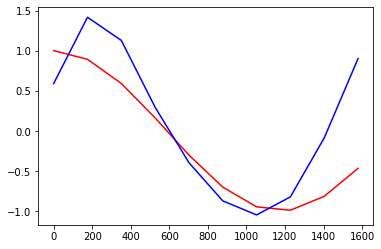

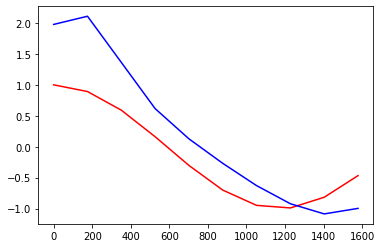

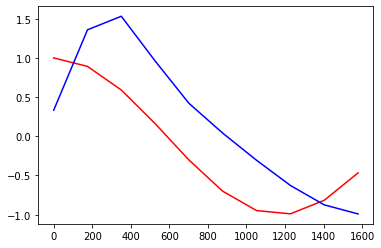

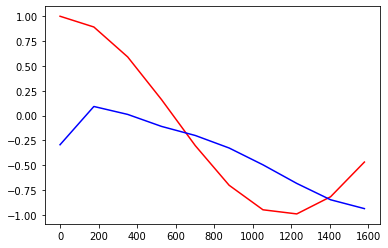

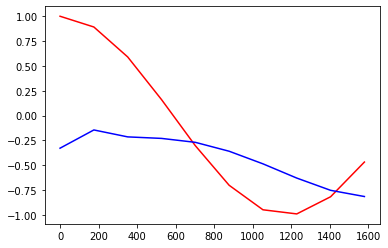

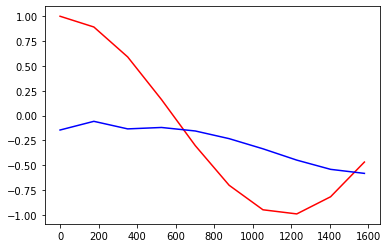

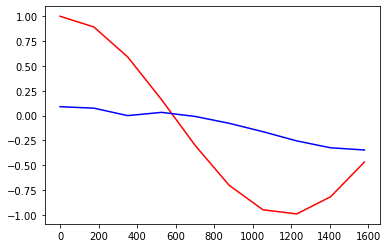

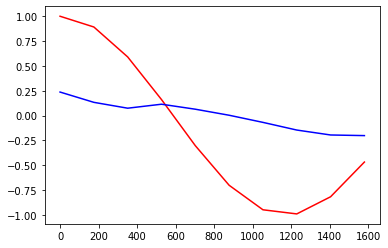

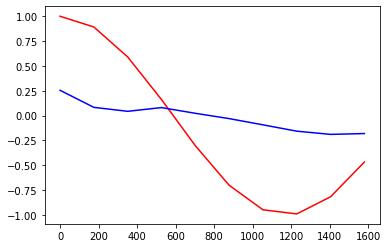

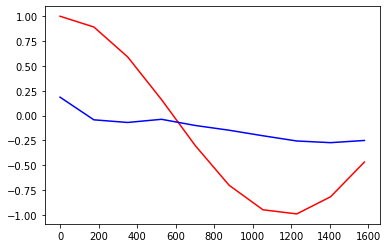

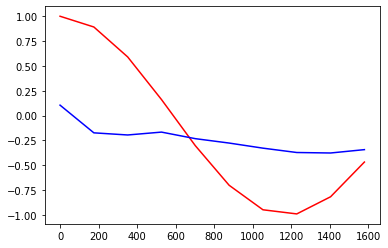

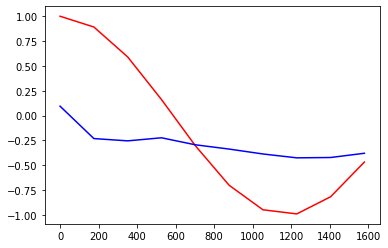

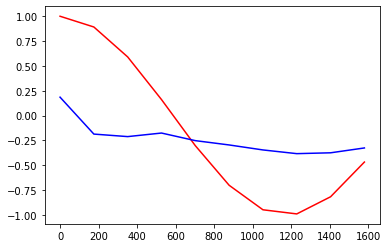

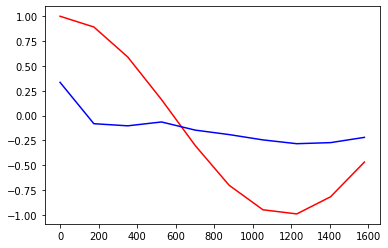

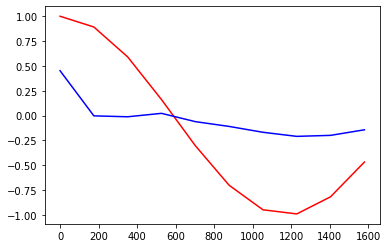

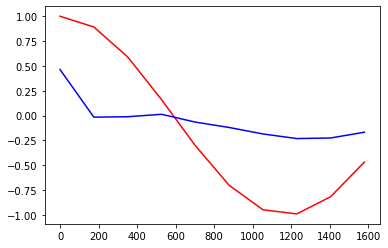

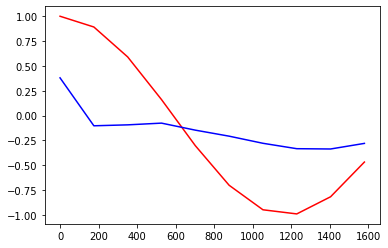

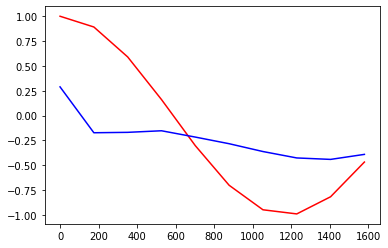

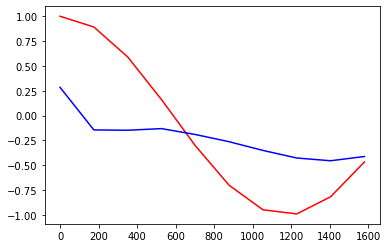

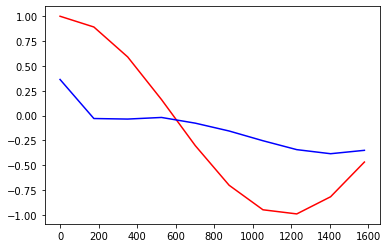

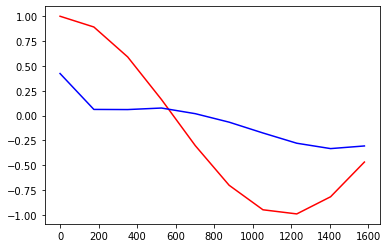

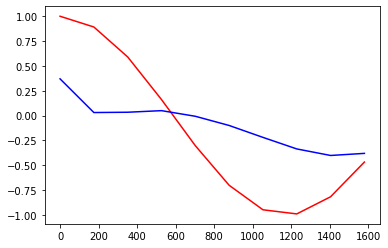

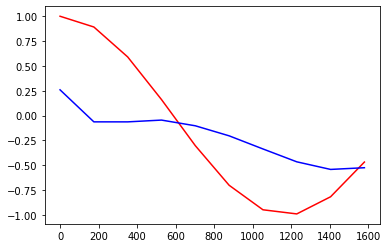

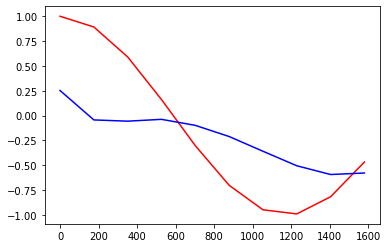

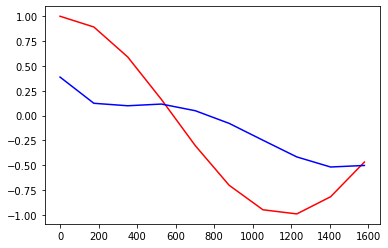

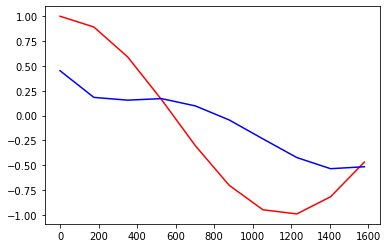

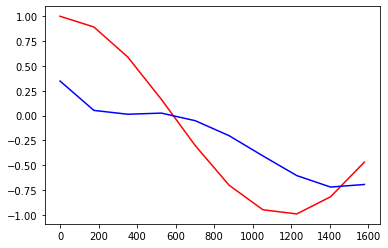

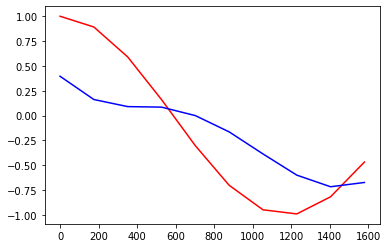

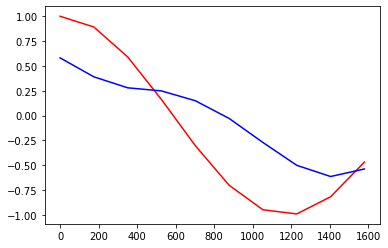

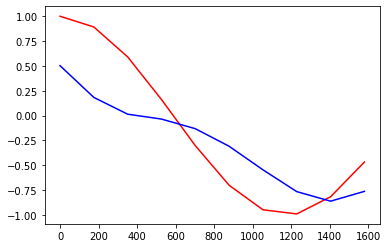

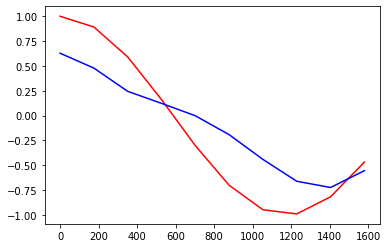

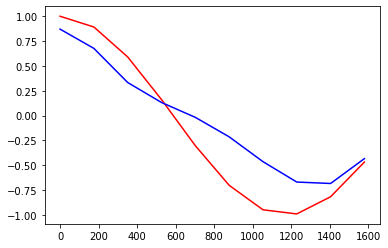

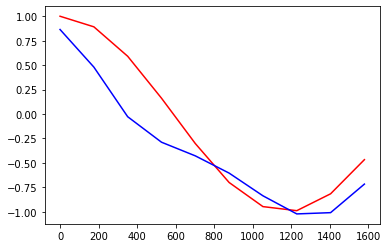

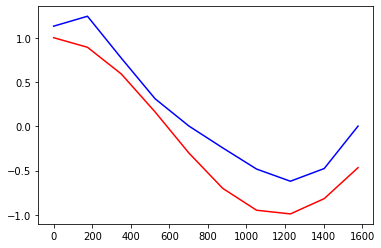

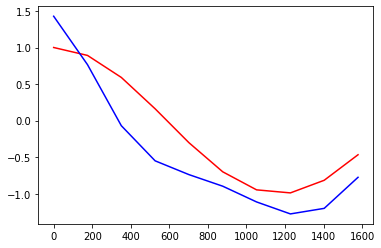

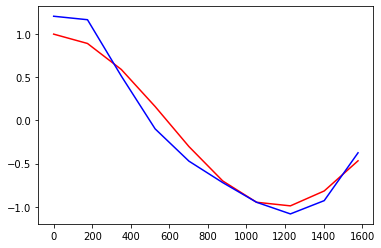

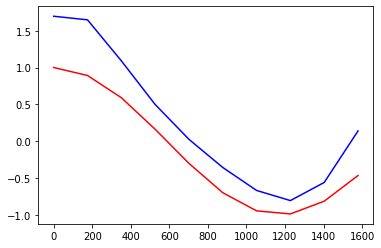

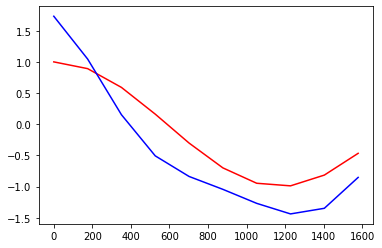

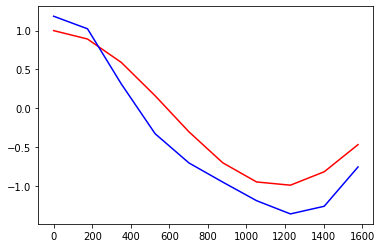

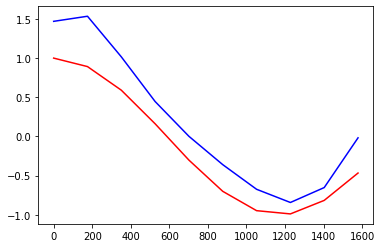

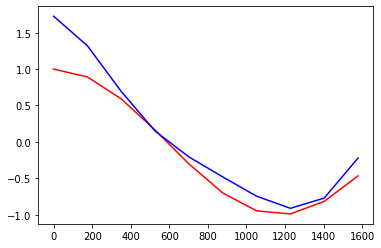

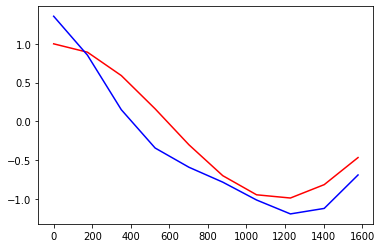

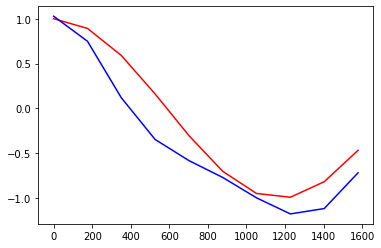

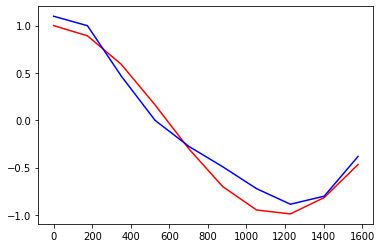

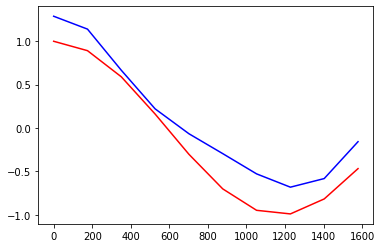

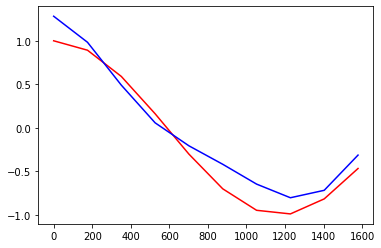

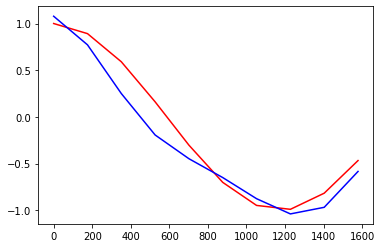

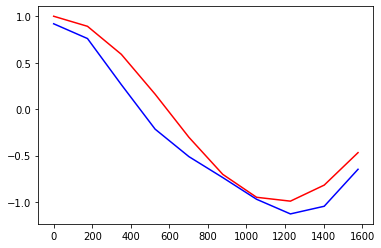

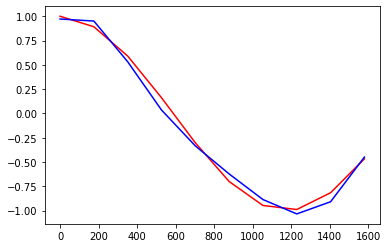

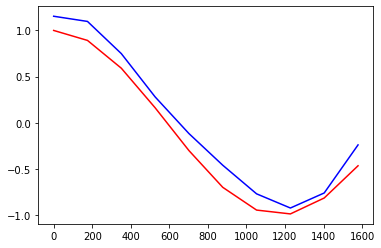

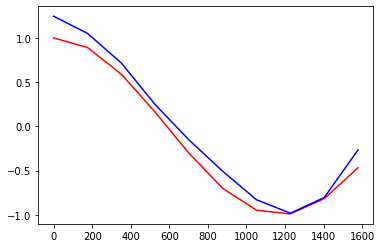

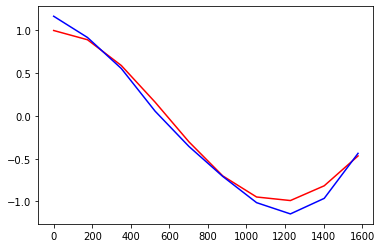

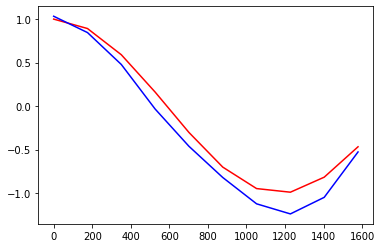

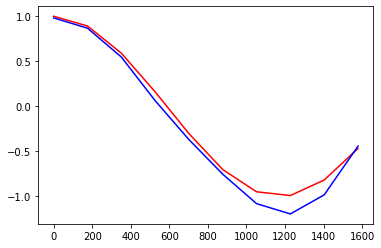

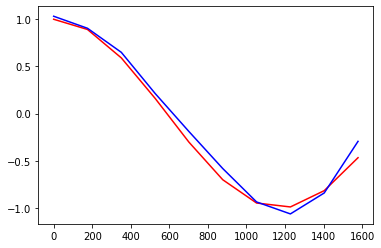

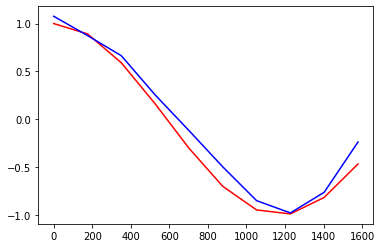

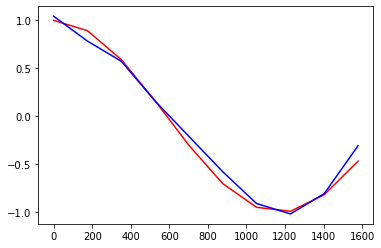

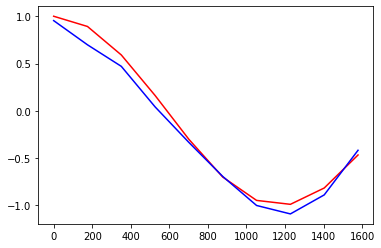

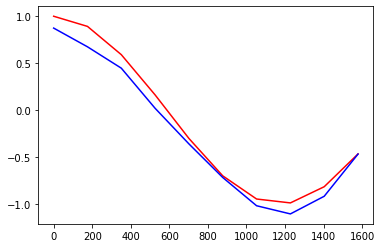

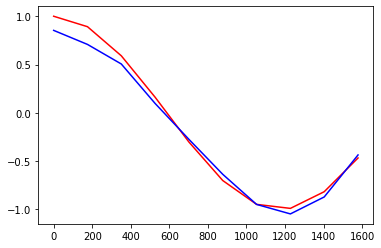

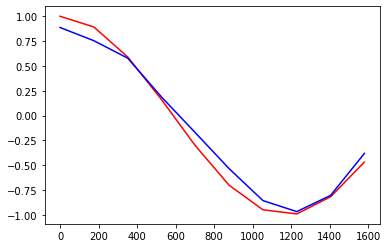

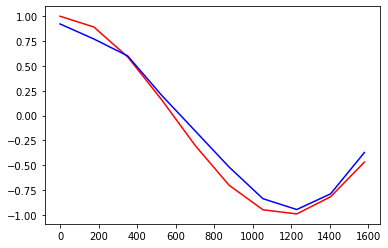

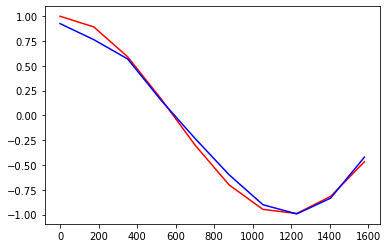

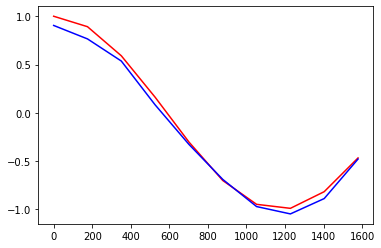

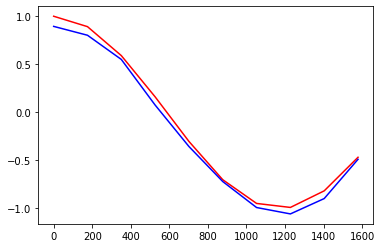

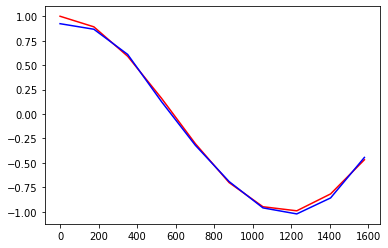

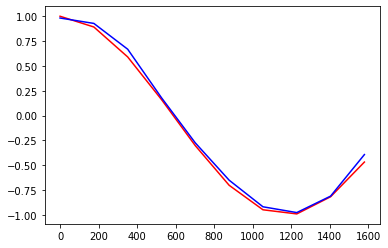

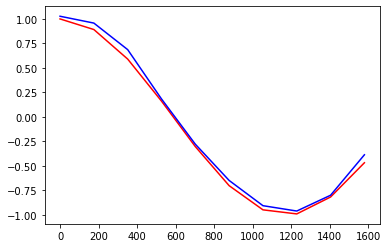

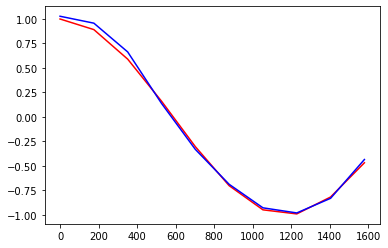

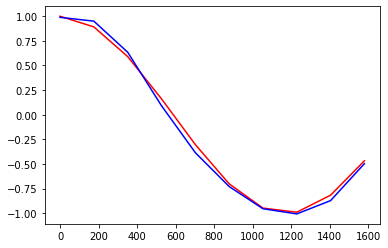

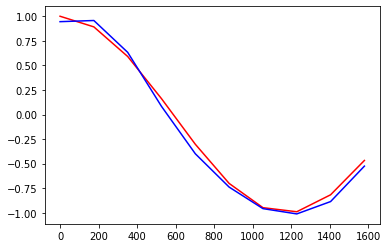

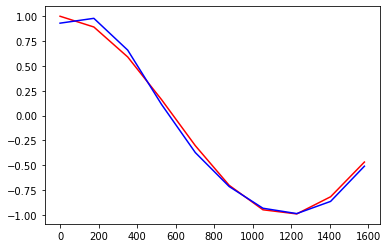

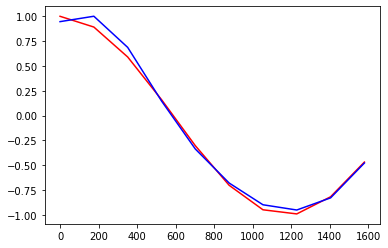

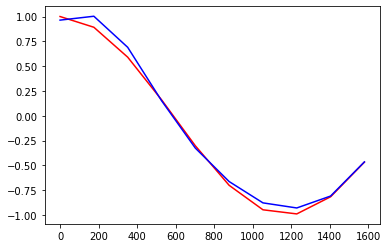

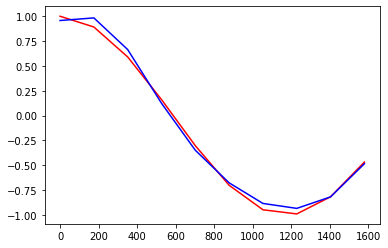

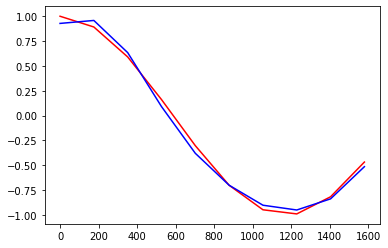

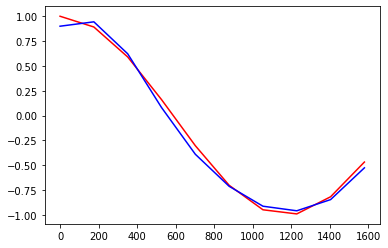

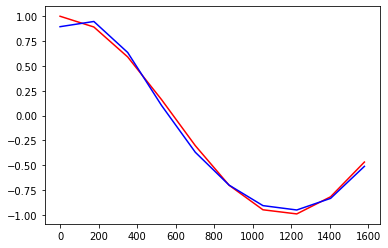

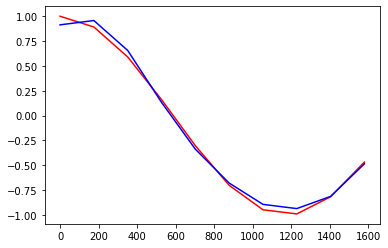

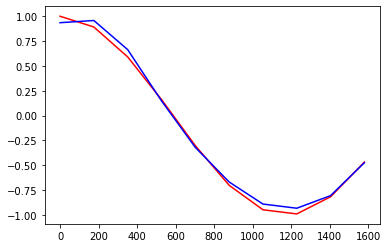

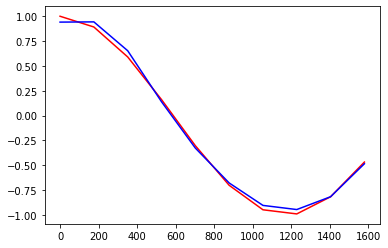

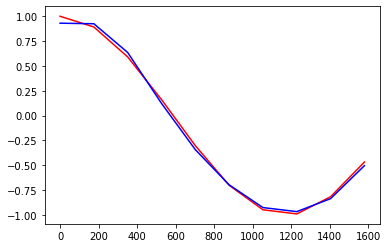

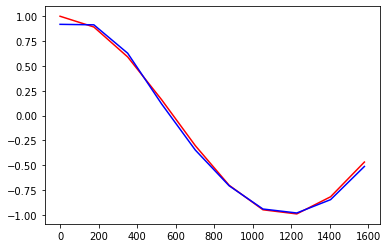

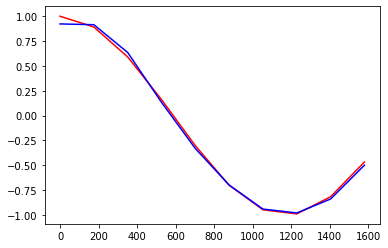

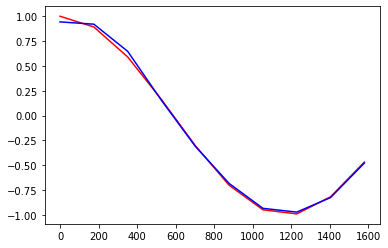

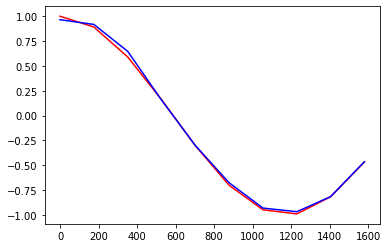

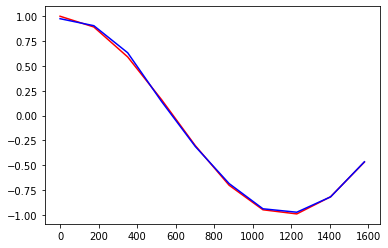

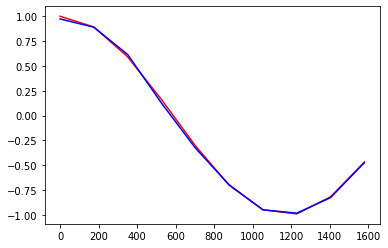

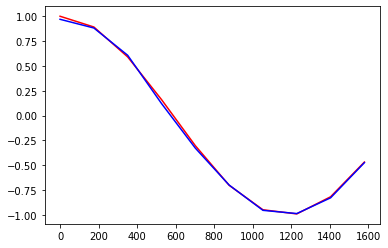

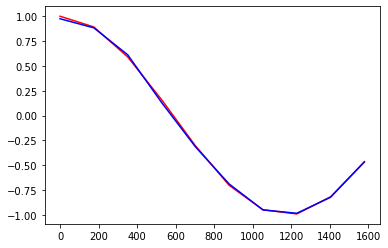

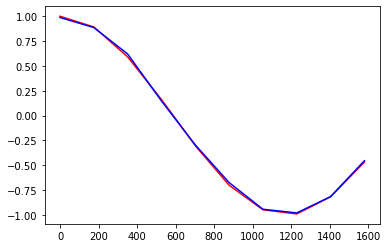

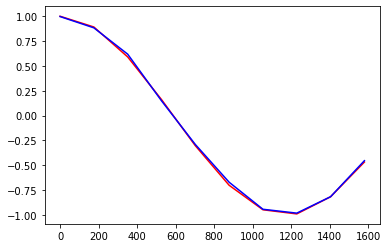

tensor(0.0002, grad_fn=<MseLossBackward>)


In [104]:
h_state = None 
plt.figure(1, figsize=(12, 5))
plt.ion()          
# continuously plot


for _ in range(100):
        
    x_t = torch.from_numpy(x[np.newaxis, :, np.newaxis])# shape (batch, time_step, input_size)
    y_t = torch.from_numpy(y[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x_t, h_state)   # rnn output
    # !! next step is important !!
    h_state = h_state.data # repack the hidden state, break the connection from last iteration
    loss = loss_func(prediction, y_t)         
    optimizer.zero_grad()                   
    loss.backward()                         
    optimizer.step()                        
    #print(loss)
    # plotting
    plt.plot(steps, y_t.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)
    
print(loss)
plt.ioff()
plt.show()

### LSTM PYTORCH

Αυτό που αλλάζει στο LSTM μοντέλο, είναι οτι πλέον μαζί με το hidden state έχουμε και ενα memory cell το οποίο το χρησιμοποιούμε, ώστε να μεταφέρουμε πληροφορία από προηγούμενα time steps στα επόμενα.

Στον κώδικα ουσιαστικά το μόνο που αλλάζουμε είναι τη συνάρτηση να καλούμε το LSTM αντί του RNN ενώ στο training κομμάτι, πρέπει να αλλάξουμε τα εξής:

    - hidden = hidden.data -> διαγραφή αυτής της γραμμής
    - loss.backward(retain_graph=True) -> εισαγωγή παραμέτρου retrain_graph=True

In [106]:
class LSTMTagger(nn.Module):
    def __init__(self):
        super(LSTMTagger, self).__init__()

        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        
        r_out, h_state = self.lstm(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

lstm_nn = LSTMTagger()
optimizer = torch.optim.Adam(lstm_nn.parameters(), lr=0.02)   # optimize all rnn parameters
loss_func = nn.MSELoss()

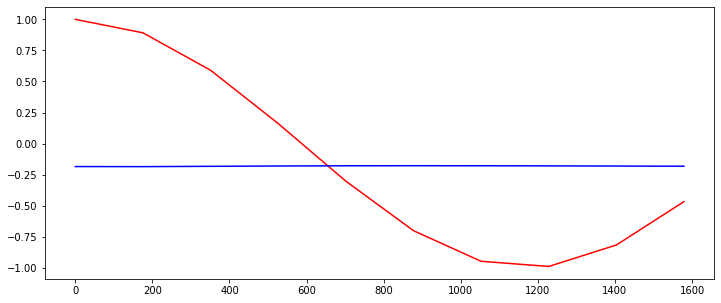

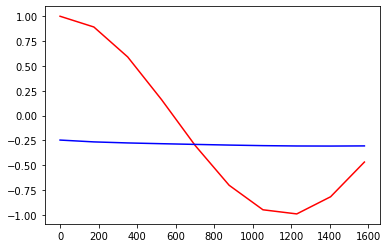

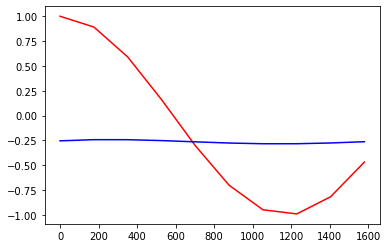

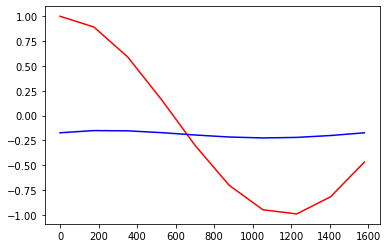

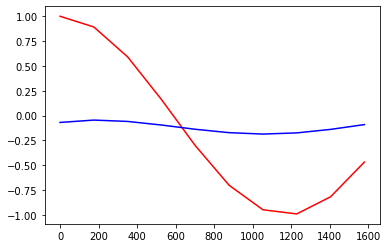

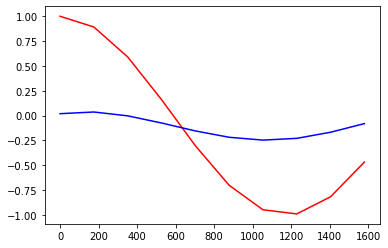

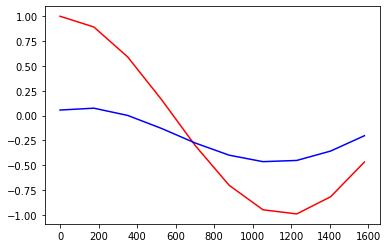

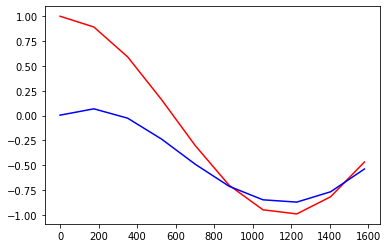

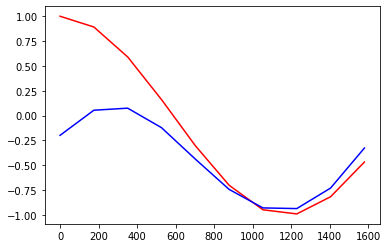

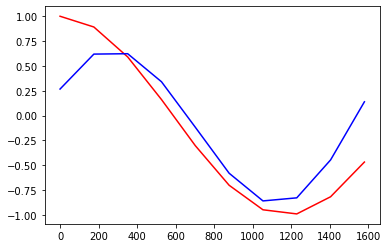

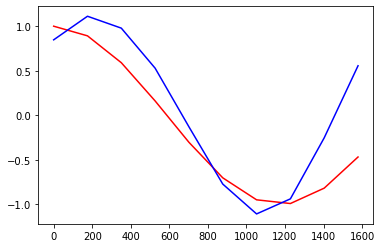

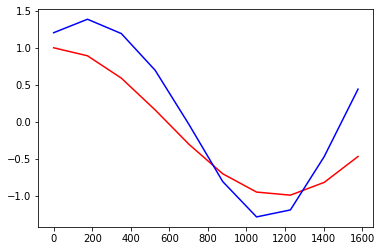

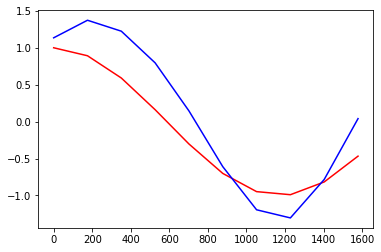

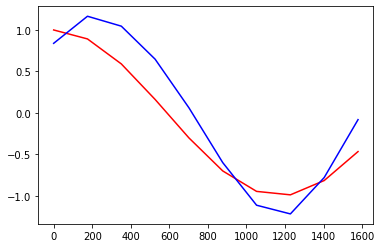

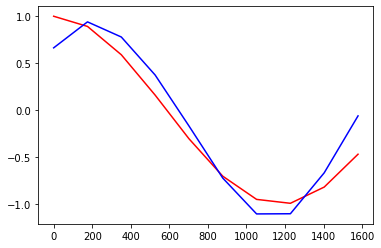

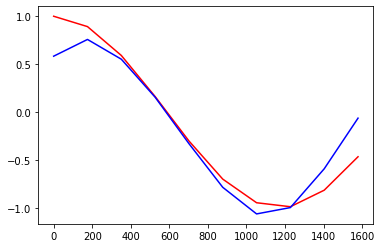

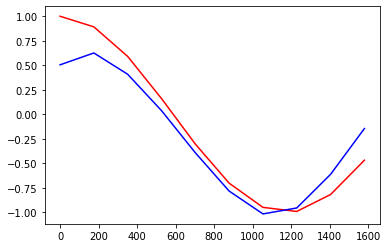

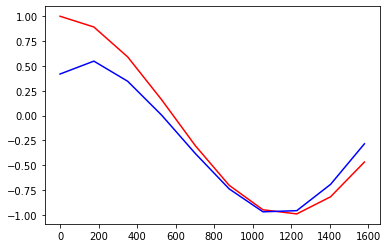

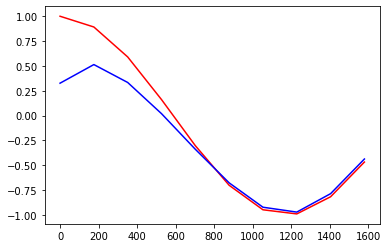

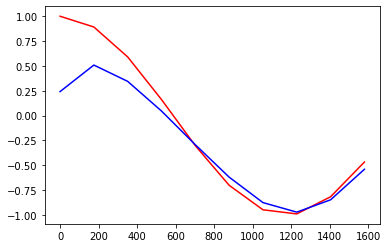

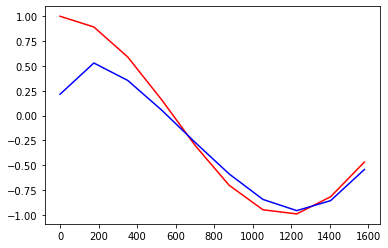

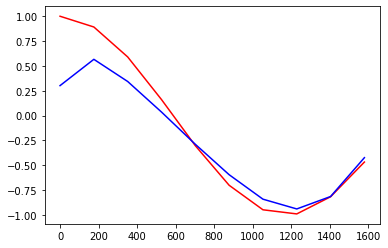

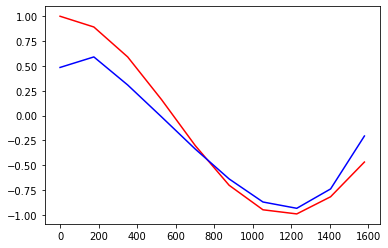

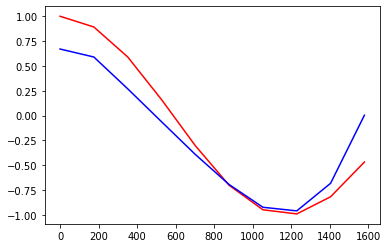

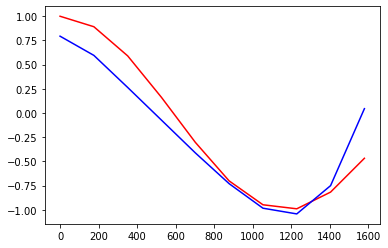

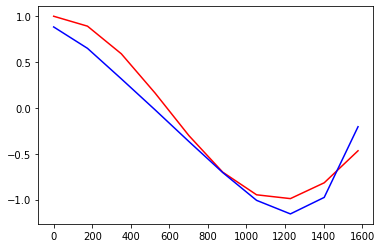

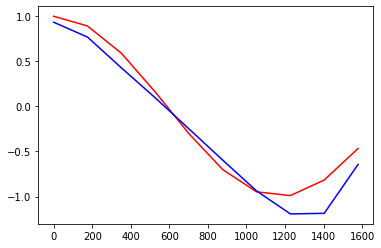

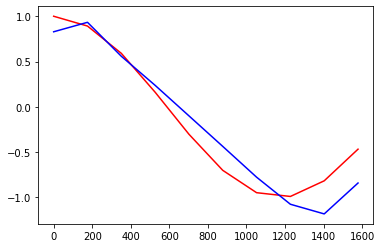

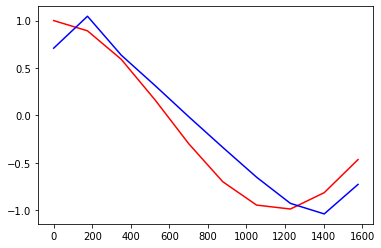

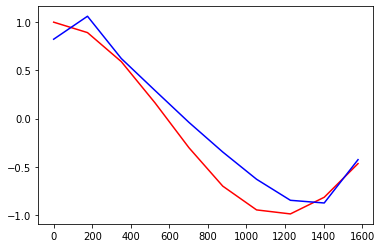

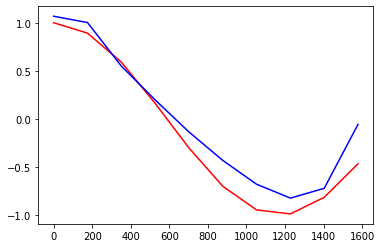

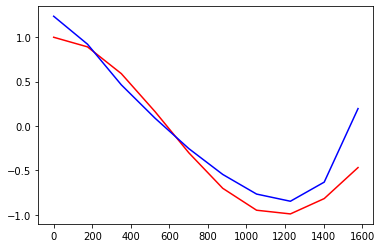

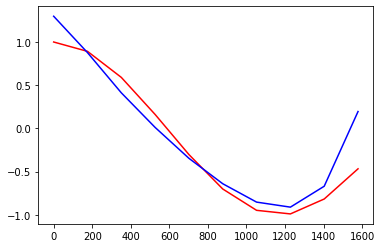

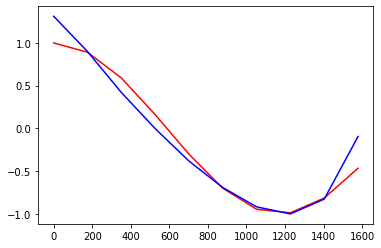

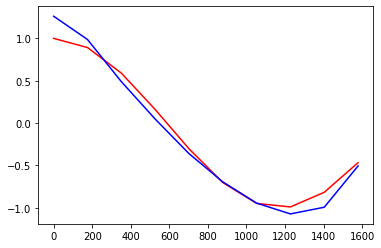

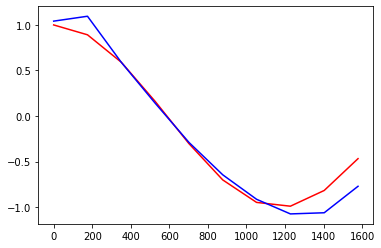

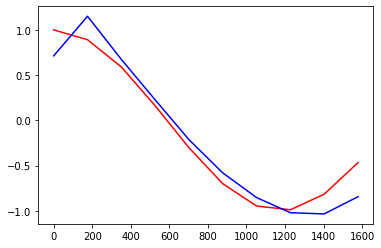

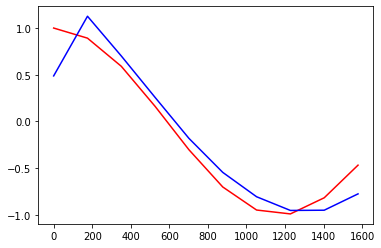

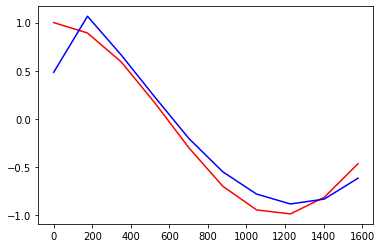

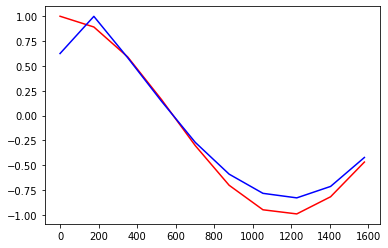

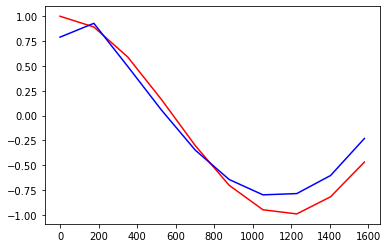

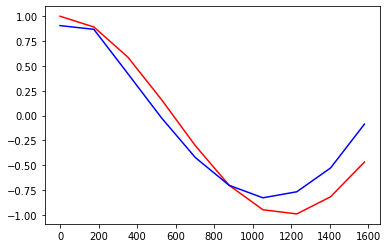

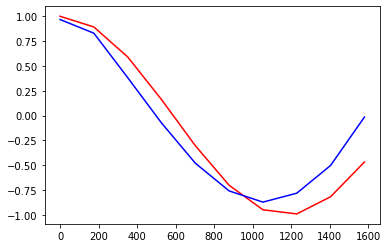

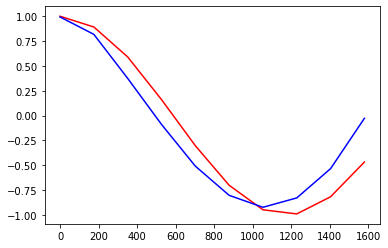

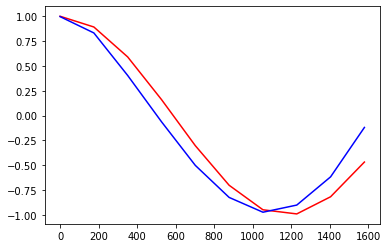

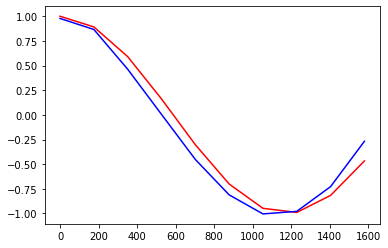

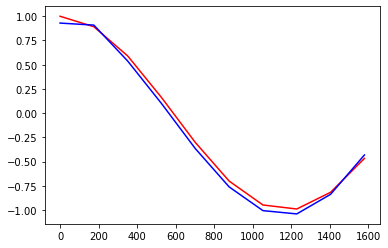

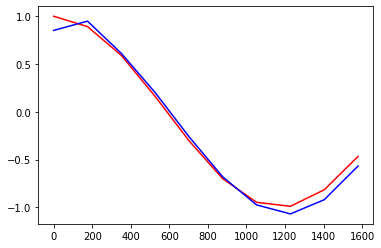

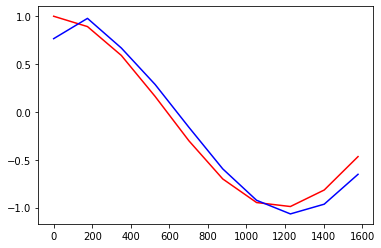

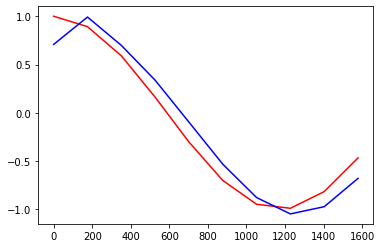

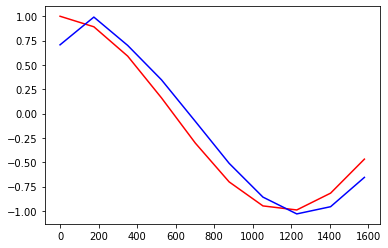

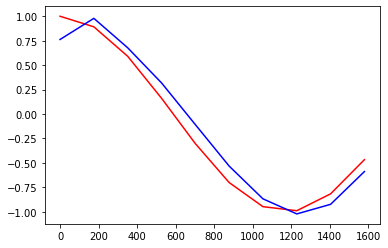

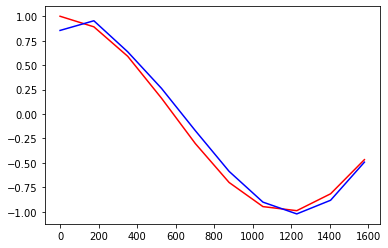

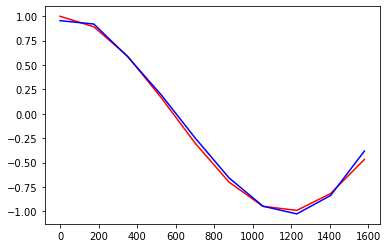

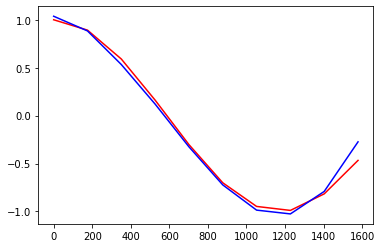

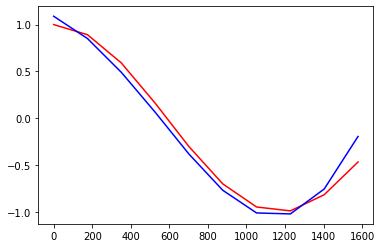

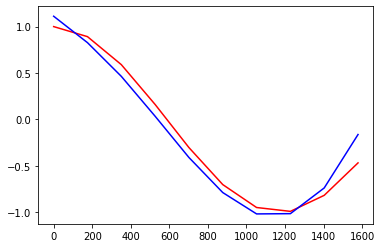

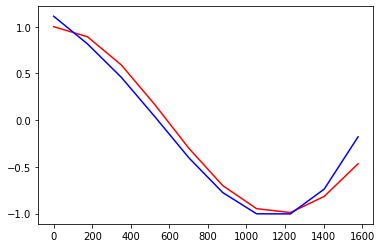

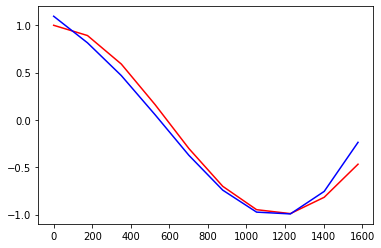

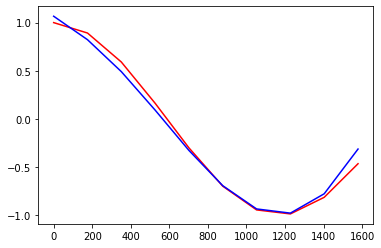

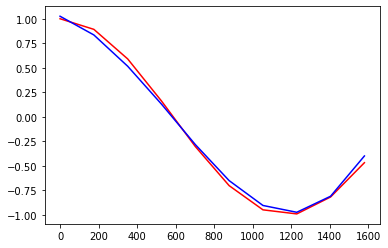

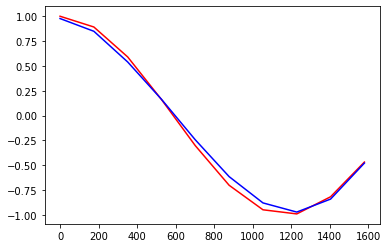

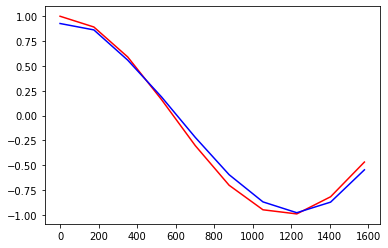

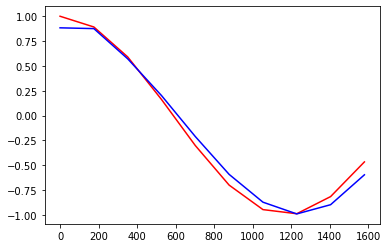

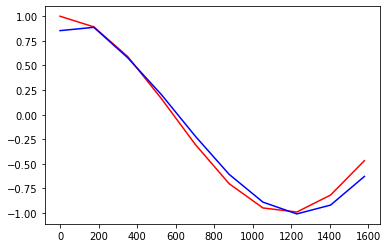

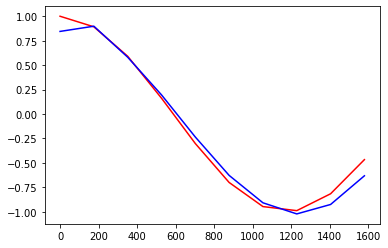

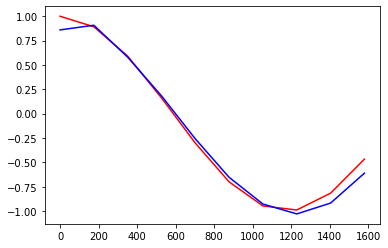

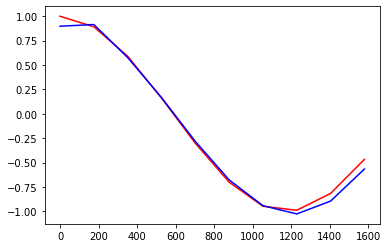

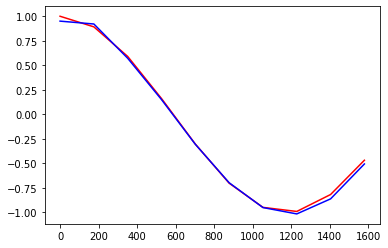

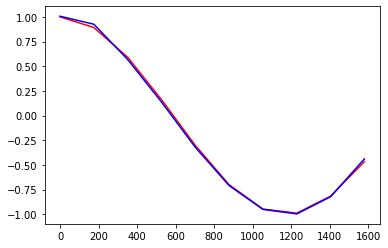

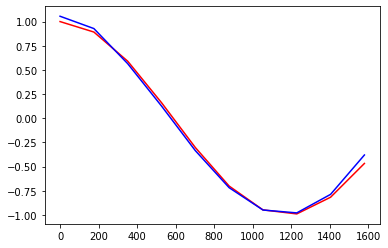

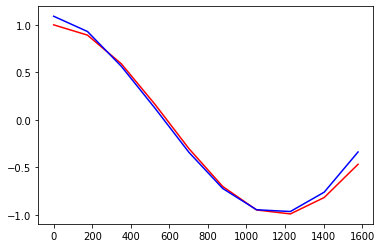

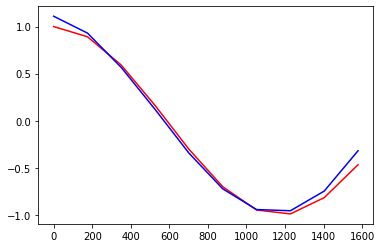

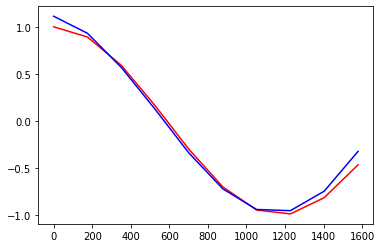

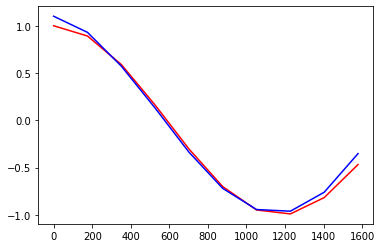

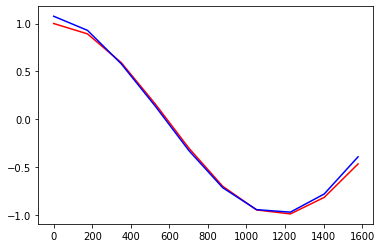

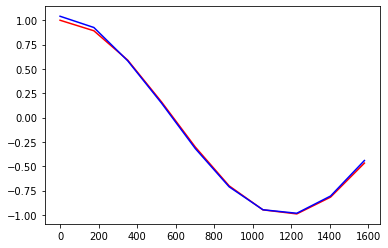

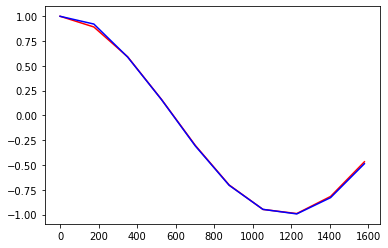

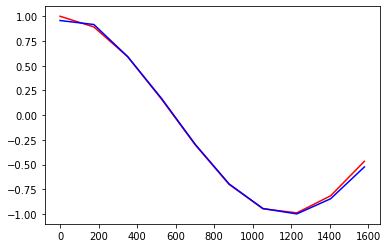

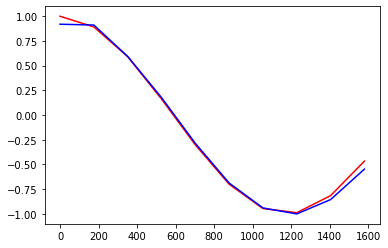

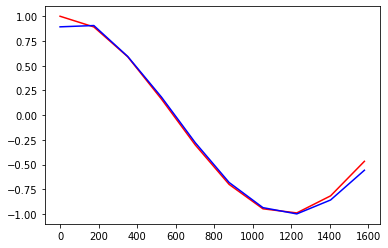

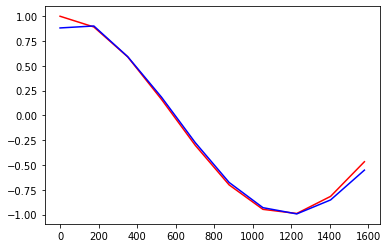

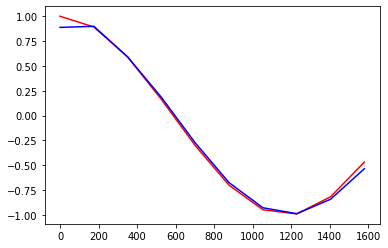

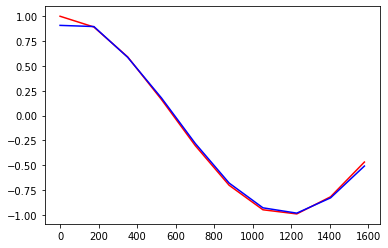

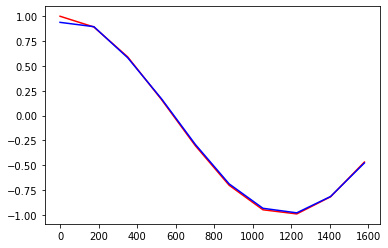

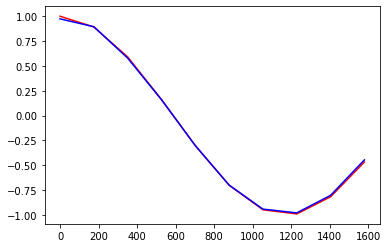

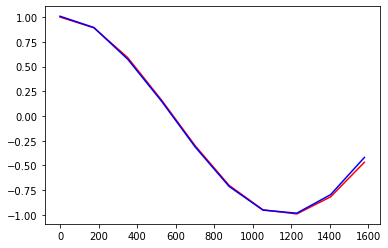

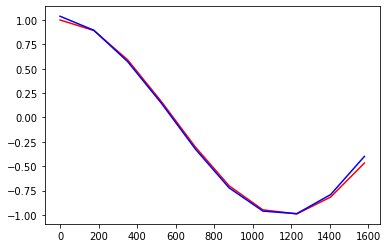

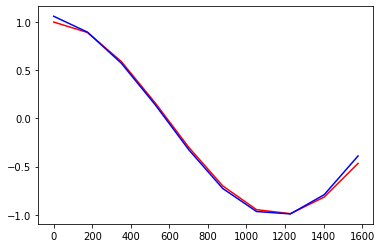

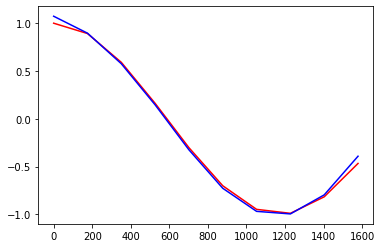

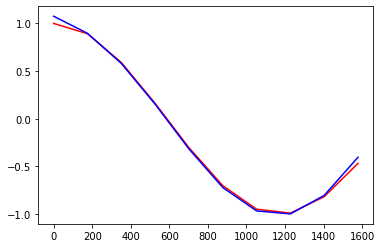

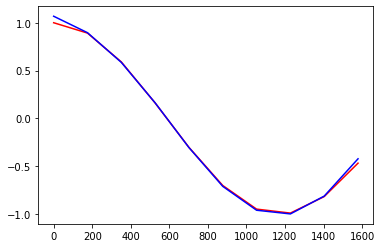

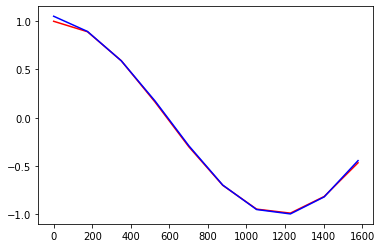

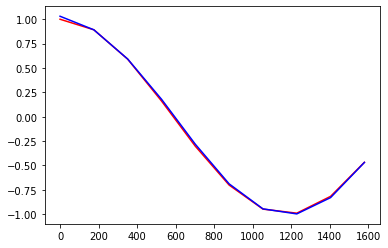

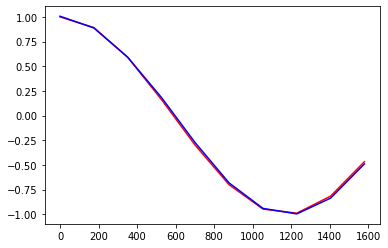

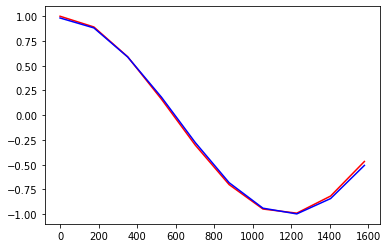

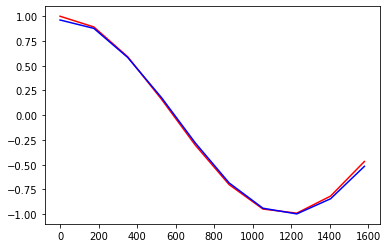

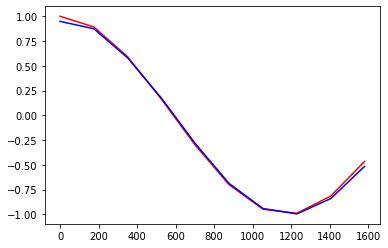

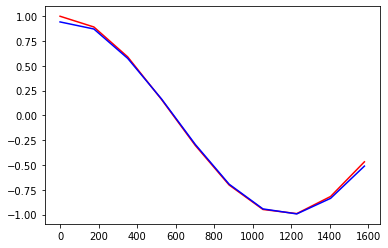

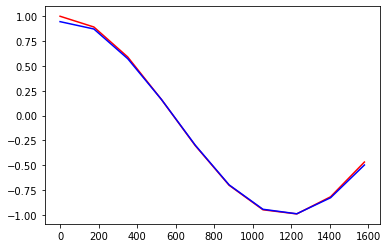

tensor(0.0005, grad_fn=<MseLossBackward>)


In [107]:
h_state = None 
plt.figure(1, figsize=(12, 5))
plt.ion()          
# continuously plot


for _ in range(100):
        
    x_t = torch.from_numpy(x[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y_t = torch.from_numpy(y[np.newaxis, :, np.newaxis])

    prediction, h_state = lstm_nn(x_t, h_state)   # rnn output
    # !! next step is important !!
    loss = loss_func(prediction, y_t)         # calculate loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward(retain_graph=True)                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients
    #print(loss)
    # plotting
    plt.plot(steps, y_t.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)
    

plt.ioff()
plt.show()
print(loss)

Το loss του lstm παρατηρούμε πως είναι αρκετά καλύτερο. Γενικά αυτό το μοντέλο είναι αρκετά πιο δυνατό από το απλό RNN μοντέλο.

### ΒΗΜΑ 9 

Διαχωρίζουμε τα δεδομένα training σε train - validation sets με stratified δομή. Χρησιμοποιούμε τη συνάρτηση parser.py που μας δίνεται, για να πάρουμε τα δεδομένα και έπειτα το Train το χωρίζουμε σε train - validation σετ.Η παράμετρος stratify χωρίζει τα δεδομένα έτσι ώστε να διατηρηθεί το ποσοστό του κάθε label (0-9) του χωριζόμενου μέρους (X_train) σε κάθε ένα από τα splits (X_train, X_val). Δηλαδή, αν υπάρχει το ψηφίο "0" σε ποσοστό 13%, τότε και το καινούριο X_train και το X_val θα έχει "0" σε ποσοστό 13%.

Επίσης, έχουμε ορίσει και 2 συναρτήσεις mypredict , myaccuracy για τα επόμενα ερωτήματα. Αυτές αντίστοιχα υπολογίζουν τα predictions και το accuracy για το κάθε μοντέλο.

In [1]:
import numpy as np
import librosa
from glob import glob

from sklearn.preprocessing import StandardScaler

def parser(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, '*.wav'))
    fnames = [f.split('/')[-1].split('.')[0].split('_') for f in files]
    ids = [f[2] for f in fnames]
    #print(ids)
    y = [int(f[0]) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        global Fs
        wav, fs = librosa.core.load(f, sr=None)
        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=6).T for wav in wavs]
    # Print dataset info
    #print('Total wavs: {}'.format(len(frames)))

    # Standardize data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])

    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ['0', '1', '2', '3', '4']
    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test

def mypredict(models,X_val):
    tmp = np.zeros(10)
    y_pred =[]
    for sample in X_val:
        for i in range(len(models)):
            logp, _ = models[i].viterbi(sample) # Run viterbi algorithm and return log-probability
            tmp[i] = logp
        y_pred.append(np.argmax(tmp))
    return y_pred

def myaccuracy(X, y):
    X = np.asarray(X)
    y = np.asarray(y)
    acc_arr = (X == y)
    return (np.sum(acc_arr) / X.shape[0]) * 100




import os
from sklearn.model_selection import train_test_split
directory = "./recordings/"
X_train, X_test, y_train, y_test, spk_train, spk_test = parser(directory)

'''split the train data into train and validation set. Use stratification to keep the number of labels'''
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify = y_train)

### ΒΗΜΑ 10-12  ΑΡΧΙΚΟΠΟΙΗΣΗ GMM , GRID SEARCH ΓΙΑ ΒΕΛΤΙΣΤΕΣ ΠΑΡΑΜΕΤΡΟΥΣ


Θα διαχωρίσουμε τα Χ_train samples ανά ψηφίο. Κάθε ψηφίο θα έχει τότε 108 samples (list). Και κάθε sample θα είναι ένα np.array με 6 features *K elements (e.g. shape = (K, 6))

In [2]:
X_train_sep = [None]*10
for k in range(10):
    X_train_sep[k] = [X_train[i] for i in range(len(y_train)) if y_train[i] == k]

### Δημιουργία και training/learning των HMM-models
Ξεκινάμε με δεδομένα ότι έχουμε τα observable dat, δηλαδή τα mfcc των wavs και με ορισμένο τον αριθμό των hidden states και το πλήθος των Gaussian που θα φτιάξουν το GMM. Τα hidden states είναι ουσιαστικά τα phones των audios ("ee", "ou", "a" κλπ) τα οποία περιγράφονται με ένα Gaussian Mixture distribution. Αυτά είναι και που περνάμε στη συνάρτηση hmmmodels. 

Μέσα στη συνάρτηση αρχικοποιούμε επίσης και τον πίνακα μεταβάσεων (με βάση τα number of states και τηρώντας τις οδηγίες της εκφώνησης). 

Κάνουμε concatenate τα data των ψηφίων και αποθηκεύουμε το αποτέλεσμα στη μεταβλητή Χ (line 23). 

Στη συνέχεια, καλούμε τη συνάρτηση "GeneralMixtureModel.from_samples" της pomegranate βιβλιοθήκης, για να δημιουργήσουμε ένα Gaussian Mixture Model βασιζόμενοι τελείως στο sample και χωρίς να ξέρουμε αρχικά καθόλου τις παραμέτρους. Η συνάρτηση αρχικοποιεί τις παραμέτρους τρέχοντας k-means και μετά εκτελεί τον αλγόριθμο ΕΜ για βελτίωση των παραμέτρων μέχρι να υπάρξει καθορισμένη σύγκλιση.

https://pomegranate.readthedocs.io/en/latest/GeneralMixtureModel.html

Το αποτέλεσμα, δηλαδή η κατανομή αποθηκεύεται στη λίστα dists. Έτσι λοιπόν, δημιουργείται για κάθε hidden state κάθε ψηφίου η κατανομή που αντιπροσωπεύει αυτό ακριβώς το state. 

Αρχικοποιούμε και τα starts & ends όπως ζητήθηκε από την εκφώνηση.

Στη συνέχεια καλούμε τη συνάρτηση HiddenMarkovModel.from_matrix (line 49) για να δημιουργήσουμε το κρυφό Μαρκοβιανό μοντέλο. Ένα ΗΜΜ αποτελείται από:
(1) το σύνολο των hidden states του (τα GMM των phones)
(2) τα observable states (τα mfcc)
(3) τον πίνακα μεταβάσεων μεταξύ των hidden states (trans_mat)
(4) τις αρχικές πιθανότητες εκκίνησης (starts)
(5) τα emission probabilites P(O[i] is generated by state q[j])

https://web.stanford.edu/~jurafsky/slp3/A.pdf

Στη HiddenMarkovModel.from_matrix λοιπόν δίνουμε όρισμα το (1), (3), (4) και επιπλέον τις πιθανότητες "κατάληξης" (η τελευταία κατάσταση καθώς είμαστε σε left-to-right model) καθώς και τα ονόματα των states. Όταν εκτελείται λοιπόν υπολογίζονται και τα emission probabilities κι έτσι έχουμε ένα "άδειο" μοντέλο (χωρίς τα observable data/states) και με ενδεχομένως "κακώς" αρχικοποιημένες αυτές όλες τις παραμέτρους. Ωστόσο το μοντέλο είναι έτοιμο. 

Κάνοντας fit (line 52) όλα τα δεδομένα κάθε ψηφίου στο μοντέλο αυτό ουσιαστικά του κάνουμε training έτσι ώστε να επανεκτιμήσει και να μάθει (learn) τις παραμέτρους του μοντέλου. Έτσι έχουμε ένα πλήρες ΗΜΜ για κάθε ψηφίο το οποίο το αποθηκεύουμε στη λίστα models. 

In [ ]:

import numpy as np
from pomegranate import *

def hmmmodels(nstates,nmixtures,X_train):
    #####
    models=[] # index shows which number our hmm predicts
    n_states = nstates # the number of HMM states
    num_mixtures = nmixtures # the number of Gaussians
    
    trans_mat = np.zeros((n_states,n_states))
    for i in range(n_states):
        for j in range(n_states):
            if i == j :
                trans_mat[i][j] = 0.5
            if j == i+1:
                trans_mat[i][j] = 0.5
            if (i == n_states-1) and ( j == n_states-1):
                trans_mat[i][j] = 1    
                
    for i in range(10):
        #print(i)

        X = np.float_(np.concatenate(X_train[i])) # data from a single digit (can be a numpy array)


        
        gmm = True # whether to use GMM or plain Gaussian
        if num_mixtures == 1:
            gmm = False
        

        dists = [] # list of probability distributions for the HMM states
        for i in range(n_states):
            if gmm:
                a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, num_mixtures, X)
            else:
                a = MultivariateGaussianDistribution.from_samples(X)
            dists.append(a)

        starts = np.zeros(n_states)
        starts[0] = 1
        ends = np.zeros(n_states) # your ending probability matrix
        ends[-1] = 1

        data = list(X) # your data: must be a Python list that contains: 2D lists with the sequences (so its dimension would be num_sequences x seq_length x feature_dimension)
                  # But be careful, it is not a numpy array, it is a Python list (so each sequence can have different length)

        #T Define the GMM-HMM
        model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends, state_names=['s{}'.format(i) for i in range(n_states)])

        # Fit the model
        model.fit(data, max_iterations=5)
        models.append(model)
    return models

### Validation

Σε αυτό το βήμα, παίρνουμε το Χ_val set το οποίο περιέχει τα samples που θα κάνουν validate τα μοντέλα μας. Κάθε sample θα βγάλει ένα log likelihood (μέσω του Viterbi) για κάθε ένα από τα 10 ΗΜΜ μοντέλα (συνάρτηση predict) και θα κρατήθεί το max log likelihood -βασικά το argmax του log likelihood- το οποίο θα χρησιμοποιήσει η συνάρτηση accuracy για να βρει αν έγινε σωστή πρόβλεψη. Αυτή η διαδικασία θα τρέξει συνολικά 16 φορές, γιατί έχουμε βάλει να τρέξει για 4 διαφορετικά number of states (1-4) και 4 διαφορετικά number of Gaussians (2-5). Αυτή τη διαδικασία την κάνουμε γιατί εμείς δεν μπορούμε να γνωρίζουμε κάπως πόσα hidden states χρειάζονται και με πόσες Γκαουσιανές θα φτιαχτεί το πιο αντιπροσωπευτικό GMM. Άλλωστε βρισκόμαστε σε μια unsupervised learning περίπτωση οπότε αν περιορίσουμε τον αλγόριθμο υπάρχει ο κίνδυνος δημιουργίας ενός κακού classifier.  

Θα κρατηθεί ως τελικό το καλύτερο accuracy και θα κρατηθεί ποιος συνδυασμός το έδωσε. 

In [ ]:
### grid search
max_accuracy = 0.0
best_state = 0
best_gmm = 0
#nstates,nmixtures
for i in range (1,5): # 1- 4 states
    for j in range(1,6): # 2-5 mixtures or 1 multivariate gaussian       
        print(i,j)
        create_models = hmmmodels(i,j,X_train_sep)
        temp_score = myaccuracy(mypredict(create_models,X_val),y_val)
        print(temp_score)
        if temp_score > max_accuracy:
            best_state = i
            best_gmm = j
print("GMM-HMM model with best accuracy is with {} states and {} gmms".format(best_state,best_gmm))

Το μοντέλο με τις καλύτερες παραμέτρους είναι αυτό με 4 καταστάσεις και 5 γκαουσιανές

In [ ]:
create_models = hmmmodels(4,5,X_train_sep)
temp_score = myaccuracy(mypredict(create_models,X_val),y_val)

98.51851851851852 ~ accuracy score in validation set

In [ ]:
myaccuracy(mypredict(create_models,X_test),y_test)

97.33333333333334 ~ accuracy score in test set

Σώνουμε το μοντέλο σε binary , ώστε να το φορτώνουμε όποτε θέλουμε

In [3]:
import pickle
#pickle.dump(create_models,open("best_model.pkl","wb"))

Παρακάτω φορτώνουμε το binary αρχείο και έτσι ξανά έχουμε το μοντέλο μας.

In [4]:
testmodel = pickle.load(open("best_model.pkl", "rb"))

### ΒΗΜΑ 13 

In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Αρχικά φτιάχνουμε το confusion matrix μέσω της confusion_matrix του sklearn. Δίνουμε όρισμα τα predictions που λάβαμε από καλύτερο μοντέλο και τα συγκρίνουμε με τα labels των training και validation sets αντίστοιχα. Το αποτέλεσμα είναι ένας πίνακας 10x10. Κάθε κελί (i,j) δηλώνει πόσες φορές το ψηφίο i ταξινομήθηκε ως ψηφίο j.

In [6]:
from sklearn.metrics import confusion_matrix
cm_val = confusion_matrix(y_val,mypredict(testmodel ,X_val) )
cm_test = confusion_matrix(y_test, mypredict(testmodel ,X_test))

In [7]:
cm_val

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 26]])

In [8]:
cm_test

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15]])

In [10]:
classes = [0,1,2,3,4,5,6,7,8,9]

### plotting
Τα αντίστοιχα plots μας δίνουν μια διαφορετική μορφή αυτού του πίνακα, με τις τιμές να έχουν κανονικοποιηθεί έτσι ώστε να εκφράζουν ποσοστό, και με τα πιο σκούρα χρώματα να αντιστοιχούν σε μεγαλύτερα ποσοστά, έναντι των ανοιχτών χρωμάτων που αντιστοιχούν σε χαμηλά ποσοστά. 

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.96296296 0.         0.         0.         0.03703704
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.03703704 0.         0.         0.96296296 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.96296296 0.         0.03703704 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 

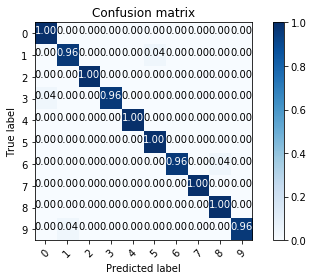

In [11]:
plot_confusion_matrix(cm_val,classes,normalize=True)

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.93333333 0.         0.         0.
  0.         0.06666667 0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.13333333 0.         0.         0.86666667 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.06666667
  0.93333333 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 

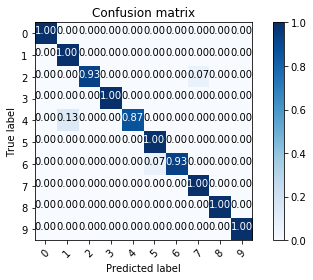

In [12]:
plot_confusion_matrix(cm_test,classes,normalize=True)

### ΒΗΜΑ 14 

#### Δείτε το lstm_step14.ipynb